In [1]:
import reobase_analysis.exper_utils as xu
import reobase_analysis.build_table as bt
import matplotlib.pylab as plt
import reobase_analysis.sin_utils as su
import reobase_analysis.table_plot_helper as tpl
import isee_engine.bionet.config as config
import numpy as np
import pandas as pd

# Build tables

For this part, you need to have a json file in the following folder: "/allen/aibs/mat/sooyl/Stimulus_Item_Values"

In [2]:
experiment_id = ['2018_10_24_133422']
sampling_freq = 50
# Any frequency lower than lowcut_freq and higher than highcut_freq is discarded from Vext
lowcut_freq = 0.5 
highcut_freq = 200 
saved_data = False

for ID in experiment_id:
     bt.build_expr_table(ID, sampling_freq, lowcut_freq, highcut_freq)

# Read the table

#### You can read the table by providing the path or by using the experiment_id. This is by providing the path:

In [3]:
xu.read_table_h5("/allen/aibs/mat/sooyl/result_tables/table_2018_10_24_133422_50.h5")

/home/fahimehb/Pycode/Brain_stim/reobase_analysis/exper_utils.py:253: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  row['spike_tt'], row['spike_tt'])
/home/fahimehb/Pycode/Brain_stim/reobase_analysis/exper_utils.py:255: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  row['spike_tt'], row['spike_phase'])


,sweep_number,ex_el_id,stim_el_id,in_el_id,ex_el_distance(mu),spike_tt,ex_amp(nA),ex_frequency,ex_dur(ms),ex_delay(ms),...,vi_phase,vm_amp(mV),vm_phase,avg_vm(mV),spike_phase,spike_tt_A,spike_phase_A,num_spikes,num_spikes_A,spike_phase_A_corrected
57_56_4_0_1_160,56.0,4.0,2.0,5.0,100.0,"[3017.92, 3037.42, 3062.32, 3096.1, 3138.2, 31...",0.0,1.0,13000.0,1000.0,...,NaN,NaN,NaN,NaN,"[1.66402874811, 1.75603087004, 1.9231014082, 2...","[3554.42, 3616.14, 3678.34, 3755.3, 3829.5, 39...","[-1.29088284328, -0.921483538708, -0.506154898...",24,13,"[3.42150613711, 3.79090544168, 4.20623408141, ..."
58_56_4_0_5_160,56.0,4.0,2.0,5.0,100.0,"[3017.92, 3037.42, 3062.32, 3096.1, 3138.2, 31...",0.0,5.0,13000.0,1000.0,...,NaN,NaN,NaN,NaN,"[2.06689208287, 2.74213583057, -2.76453274137,...","[3554.42, 3616.14, 3678.34, 3755.3, 3829.5, 39...","[0.107559163769, 1.98144595021, -2.3261078168,...",24,13,"[4.81994814415, 0.410649623418, 2.38628116358,..."
59_56_4_0_9_160,56.0,4.0,2.0,5.0,100.0,"[3017.92, 3037.42, 3062.32, 3096.1, 3138.2, 31...",0.0,9.0,13000.0,1000.0,...,NaN,NaN,NaN,NaN,"[2.52350255119, -2.59204713256, -1.16316326171...","[3554.42, 3616.14, 3678.34, 3755.3, 3829.5, 39...","[1.47246493208, -1.36735969132, 2.15836872378,...",24,13,"[6.18485391246, 3.34502928906, 0.587572396986,..."
60_56_4_0_31_160,56.0,4.0,2.0,5.0,100.0,"[3017.92, 3037.42, 3062.32, 3096.1, 3138.2, 31...",0.0,31.0,13000.0,1000.0,...,NaN,NaN,NaN,NaN,"[-1.23522230019, 2.46105315968, 1.09511606772,...","[3554.42, 3616.14, 3678.34, 3755.3, 3829.5, 39...","[2.70641089669, 2.15947218496, 1.70449543306, ...",24,13,"[1.1356145699, 0.588675858166, 0.133699106261,..."
57_56_7_0_1_160,56.0,7.0,2.0,5.0,50.0,"[3017.92, 3037.42, 3062.32, 3096.1, 3138.2, 31...",0.0,1.0,13000.0,1000.0,...,NaN,NaN,NaN,NaN,"[1.64694905194, 1.77346219146, 1.94857703132, ...","[3554.42, 3616.14, 3678.34, 3755.3, 3829.5, 39...","[-1.22973029727, -0.871816129322, -0.467391435...",24,13,"[3.48265868312, 3.84057285106, 4.24499754444, ..."
58_56_7_0_5_160,56.0,7.0,2.0,5.0,50.0,"[3017.92, 3037.42, 3062.32, 3096.1, 3138.2, 31...",0.0,5.0,13000.0,1000.0,...,NaN,NaN,NaN,NaN,"[2.11339898078, 2.72546077375, -2.79722953481,...","[3554.42, 3616.14, 3678.34, 3755.3, 3829.5, 39...","[0.0983702060712, 2.04830296475, -2.2719002116...",24,13,"[4.81075918646, 0.477506637951, 2.44048876871,..."
59_56_7_0_9_160,56.0,7.0,2.0,5.0,50.0,"[3017.92, 3037.42, 3062.32, 3096.1, 3138.2, 31...",0.0,9.0,13000.0,1000.0,...,NaN,NaN,NaN,NaN,"[2.56766548047, -2.64169877518, -1.25125771692...","[3554.42, 3616.14, 3678.34, 3755.3, 3829.5, 39...","[1.44987264306, -1.32244752061, 2.18196165972,...",24,13,"[6.16226162344, 3.38994145977, 0.61116533293, ..."
60_56_7_0_31_160,56.0,7.0,2.0,5.0,50.0,"[3017.92, 3037.42, 3062.32, 3096.1, 3138.2, 31...",0.0,31.0,13000.0,1000.0,...,NaN,NaN,NaN,NaN,"[-1.26809091598, 2.50149592519, 1.10253127196,...","[3554.42, 3616.14, 3678.34, 3755.3, 3829.5, 39...","[2.71350346709, 2.1503641015, 1.70075843149, -...",24,13,"[1.1427071403, 0.579567774708, 0.129962104693,..."
57_4_100_1_160,57.0,4.0,2.0,5.0,100.0,"[3016.94, 3034.94, 3058.78, 3092.12, 3132.38, ...",100.0,1.0,13000.0,1000.0,...,NaN,NaN,NaN,NaN,"[1.67795373432, 1.76092020442, 1.89386210623, ...","[3553.64, 3613.5, 3671.46, 3731.32, 3804.18, 3...","[-1.29999407459, -0.937353155223, -0.576061265...",41,29,"[3.41239490579, 3.77503582516, 4.13632771525, ..."
57_7_100_1_160,57.0,7.0,2.0,5.0,50.0,"[3016.94, 3034.94, 3058.78, 3092.12, 3132.38, ...",100.0,1.0,13000.0,1000.0,...,NaN,NaN,NaN,NaN,"[1.63448554728, 1.74456347412, 1.89632123612, ...","[3553.64, 3613.5, 3671.46, 3731.32, 3804.18, 3...","[-1.23549732676, -0.876082002371, -0.482057534...",41,29,"[3.47689165362, 3.83630697801, 4.23033144576, ..."


#### This is by providing the experiment_id:

In [4]:
saved_data = False
experiment_id = '2018_10_24_133422'
table = xu.read_table_from_exp_id(experiment_id, sampling_freq, saved_data)
table


,sweep_number,ex_el_id,stim_el_id,in_el_id,ex_el_distance(mu),spike_tt,ex_amp(nA),ex_frequency,ex_dur(ms),ex_delay(ms),...,vi_phase,vm_amp(mV),vm_phase,avg_vm(mV),spike_phase,spike_tt_A,spike_phase_A,num_spikes,num_spikes_A,spike_phase_A_corrected
57_56_4_0_1_160,56.0,4.0,2.0,5.0,100.0,"[3017.92, 3037.42, 3062.32, 3096.1, 3138.2, 31...",0.0,1.0,13000.0,1000.0,...,NaN,NaN,NaN,NaN,"[1.66402874811, 1.75603087004, 1.9231014082, 2...","[3554.42, 3616.14, 3678.34, 3755.3, 3829.5, 39...","[-1.29088284328, -0.921483538708, -0.506154898...",24,13,"[3.42150613711, 3.79090544168, 4.20623408141, ..."
58_56_4_0_5_160,56.0,4.0,2.0,5.0,100.0,"[3017.92, 3037.42, 3062.32, 3096.1, 3138.2, 31...",0.0,5.0,13000.0,1000.0,...,NaN,NaN,NaN,NaN,"[2.06689208287, 2.74213583057, -2.76453274137,...","[3554.42, 3616.14, 3678.34, 3755.3, 3829.5, 39...","[0.107559163769, 1.98144595021, -2.3261078168,...",24,13,"[4.81994814415, 0.410649623418, 2.38628116358,..."
59_56_4_0_9_160,56.0,4.0,2.0,5.0,100.0,"[3017.92, 3037.42, 3062.32, 3096.1, 3138.2, 31...",0.0,9.0,13000.0,1000.0,...,NaN,NaN,NaN,NaN,"[2.52350255119, -2.59204713256, -1.16316326171...","[3554.42, 3616.14, 3678.34, 3755.3, 3829.5, 39...","[1.47246493208, -1.36735969132, 2.15836872378,...",24,13,"[6.18485391246, 3.34502928906, 0.587572396986,..."
60_56_4_0_31_160,56.0,4.0,2.0,5.0,100.0,"[3017.92, 3037.42, 3062.32, 3096.1, 3138.2, 31...",0.0,31.0,13000.0,1000.0,...,NaN,NaN,NaN,NaN,"[-1.23522230019, 2.46105315968, 1.09511606772,...","[3554.42, 3616.14, 3678.34, 3755.3, 3829.5, 39...","[2.70641089669, 2.15947218496, 1.70449543306, ...",24,13,"[1.1356145699, 0.588675858166, 0.133699106261,..."
57_56_7_0_1_160,56.0,7.0,2.0,5.0,50.0,"[3017.92, 3037.42, 3062.32, 3096.1, 3138.2, 31...",0.0,1.0,13000.0,1000.0,...,NaN,NaN,NaN,NaN,"[1.64694905194, 1.77346219146, 1.94857703132, ...","[3554.42, 3616.14, 3678.34, 3755.3, 3829.5, 39...","[-1.22973029727, -0.871816129322, -0.467391435...",24,13,"[3.48265868312, 3.84057285106, 4.24499754444, ..."
58_56_7_0_5_160,56.0,7.0,2.0,5.0,50.0,"[3017.92, 3037.42, 3062.32, 3096.1, 3138.2, 31...",0.0,5.0,13000.0,1000.0,...,NaN,NaN,NaN,NaN,"[2.11339898078, 2.72546077375, -2.79722953481,...","[3554.42, 3616.14, 3678.34, 3755.3, 3829.5, 39...","[0.0983702060712, 2.04830296475, -2.2719002116...",24,13,"[4.81075918646, 0.477506637951, 2.44048876871,..."
59_56_7_0_9_160,56.0,7.0,2.0,5.0,50.0,"[3017.92, 3037.42, 3062.32, 3096.1, 3138.2, 31...",0.0,9.0,13000.0,1000.0,...,NaN,NaN,NaN,NaN,"[2.56766548047, -2.64169877518, -1.25125771692...","[3554.42, 3616.14, 3678.34, 3755.3, 3829.5, 39...","[1.44987264306, -1.32244752061, 2.18196165972,...",24,13,"[6.16226162344, 3.38994145977, 0.61116533293, ..."
60_56_7_0_31_160,56.0,7.0,2.0,5.0,50.0,"[3017.92, 3037.42, 3062.32, 3096.1, 3138.2, 31...",0.0,31.0,13000.0,1000.0,...,NaN,NaN,NaN,NaN,"[-1.26809091598, 2.50149592519, 1.10253127196,...","[3554.42, 3616.14, 3678.34, 3755.3, 3829.5, 39...","[2.71350346709, 2.1503641015, 1.70075843149, -...",24,13,"[1.1427071403, 0.579567774708, 0.129962104693,..."
57_4_100_1_160,57.0,4.0,2.0,5.0,100.0,"[3016.94, 3034.94, 3058.78, 3092.12, 3132.38, ...",100.0,1.0,13000.0,1000.0,...,NaN,NaN,NaN,NaN,"[1.67795373432, 1.76092020442, 1.89386210623, ...","[3553.64, 3613.5, 3671.46, 3731.32, 3804.18, 3...","[-1.29999407459, -0.937353155223, -0.576061265...",41,29,"[3.41239490579, 3.77503582516, 4.13632771525, ..."
57_7_100_1_160,57.0,7.0,2.0,5.0,50.0,"[3016.94, 3034.94, 3058.78, 3092.12, 3132.38, ...",100.0,1.0,13000.0,1000.0,...,NaN,NaN,NaN,NaN,"[1.63448554728, 1.74456347412, 1.89632123612, ...","[3553.64, 3613.5, 3671.46, 3731.32, 3804.18, 3...","[-1.23549732676, -0.876082002371, -0.482057534...",41,29,"[3.47689165362, 3.83630697801, 4.23033144576, ..."


# Looking at the control experiments

All the analysis for control experiment is done the same way as for the other experiment. However for the spike phase analysis, controls dont have any sin wave. Therefore we computed the spike phase based on the other sweeps with different frequencies after them. In the following table, you can see the data related to the control experiments. 

In [5]:
print table[table['ex_amp(nA)']==0]['in_dur(ms)'].unique()
print table[table['ex_amp(nA)']==0]['ex_dur(ms)'].unique()

[ 9000.]
[ 13000.]


In [7]:
table[table['ex_amp(nA)']==0]

,sweep_number,ex_el_id,stim_el_id,in_el_id,ex_el_distance(mu),spike_tt,ex_amp(nA),ex_frequency,ex_dur(ms),ex_delay(ms),...,vi_phase,vm_amp(mV),vm_phase,avg_vm(mV),spike_phase,spike_tt_A,spike_phase_A,num_spikes,num_spikes_A,spike_phase_A_corrected
57_56_4_0_1_160,56.0,4.0,2.0,5.0,100.0,"[3017.92, 3037.42, 3062.32, 3096.1, 3138.2, 31...",0.0,1.0,13000.0,1000.0,...,NaN,NaN,NaN,NaN,"[1.66402874811, 1.75603087004, 1.9231014082, 2...","[3554.42, 3616.14, 3678.34, 3755.3, 3829.5, 39...","[-1.29088284328, -0.921483538708, -0.506154898...",24,13,"[3.42150613711, 3.79090544168, 4.20623408141, ..."
58_56_4_0_5_160,56.0,4.0,2.0,5.0,100.0,"[3017.92, 3037.42, 3062.32, 3096.1, 3138.2, 31...",0.0,5.0,13000.0,1000.0,...,NaN,NaN,NaN,NaN,"[2.06689208287, 2.74213583057, -2.76453274137,...","[3554.42, 3616.14, 3678.34, 3755.3, 3829.5, 39...","[0.107559163769, 1.98144595021, -2.3261078168,...",24,13,"[4.81994814415, 0.410649623418, 2.38628116358,..."
59_56_4_0_9_160,56.0,4.0,2.0,5.0,100.0,"[3017.92, 3037.42, 3062.32, 3096.1, 3138.2, 31...",0.0,9.0,13000.0,1000.0,...,NaN,NaN,NaN,NaN,"[2.52350255119, -2.59204713256, -1.16316326171...","[3554.42, 3616.14, 3678.34, 3755.3, 3829.5, 39...","[1.47246493208, -1.36735969132, 2.15836872378,...",24,13,"[6.18485391246, 3.34502928906, 0.587572396986,..."
60_56_4_0_31_160,56.0,4.0,2.0,5.0,100.0,"[3017.92, 3037.42, 3062.32, 3096.1, 3138.2, 31...",0.0,31.0,13000.0,1000.0,...,NaN,NaN,NaN,NaN,"[-1.23522230019, 2.46105315968, 1.09511606772,...","[3554.42, 3616.14, 3678.34, 3755.3, 3829.5, 39...","[2.70641089669, 2.15947218496, 1.70449543306, ...",24,13,"[1.1356145699, 0.588675858166, 0.133699106261,..."
57_56_7_0_1_160,56.0,7.0,2.0,5.0,50.0,"[3017.92, 3037.42, 3062.32, 3096.1, 3138.2, 31...",0.0,1.0,13000.0,1000.0,...,NaN,NaN,NaN,NaN,"[1.64694905194, 1.77346219146, 1.94857703132, ...","[3554.42, 3616.14, 3678.34, 3755.3, 3829.5, 39...","[-1.22973029727, -0.871816129322, -0.467391435...",24,13,"[3.48265868312, 3.84057285106, 4.24499754444, ..."
58_56_7_0_5_160,56.0,7.0,2.0,5.0,50.0,"[3017.92, 3037.42, 3062.32, 3096.1, 3138.2, 31...",0.0,5.0,13000.0,1000.0,...,NaN,NaN,NaN,NaN,"[2.11339898078, 2.72546077375, -2.79722953481,...","[3554.42, 3616.14, 3678.34, 3755.3, 3829.5, 39...","[0.0983702060712, 2.04830296475, -2.2719002116...",24,13,"[4.81075918646, 0.477506637951, 2.44048876871,..."
59_56_7_0_9_160,56.0,7.0,2.0,5.0,50.0,"[3017.92, 3037.42, 3062.32, 3096.1, 3138.2, 31...",0.0,9.0,13000.0,1000.0,...,NaN,NaN,NaN,NaN,"[2.56766548047, -2.64169877518, -1.25125771692...","[3554.42, 3616.14, 3678.34, 3755.3, 3829.5, 39...","[1.44987264306, -1.32244752061, 2.18196165972,...",24,13,"[6.16226162344, 3.38994145977, 0.61116533293, ..."
60_56_7_0_31_160,56.0,7.0,2.0,5.0,50.0,"[3017.92, 3037.42, 3062.32, 3096.1, 3138.2, 31...",0.0,31.0,13000.0,1000.0,...,NaN,NaN,NaN,NaN,"[-1.26809091598, 2.50149592519, 1.10253127196,...","[3554.42, 3616.14, 3678.34, 3755.3, 3829.5, 39...","[2.71350346709, 2.1503641015, 1.70075843149, -...",24,13,"[1.1427071403, 0.579567774708, 0.129962104693,..."
63_61_4_0_1_160,61.0,4.0,2.0,5.0,100.0,"[3016.86, 3034.86, 3059.9, 3094.14, 3135.7, 31...",0.0,1.0,13000.0,1000.0,...,NaN,NaN,NaN,NaN,"[1.54684348125, 1.64620489406, 1.84786472488, ...","[3524.76, 3587.88, 3657.6, 3725.46, 3790.62, 3...","[-1.51095271272, -1.10340608129, -0.6587070879...",45,34,"[3.20143626767, 3.6089828991, 4.05368189239, 4..."
64_61_4_0_5_160,61.0,4.0,2.0,5.0,100.0,"[3016.86, 3034.86, 3059.9, 3094.14, 3135.7, 31...",0.0,5.0,13000.0,1000.0,...,NaN,NaN,NaN,NaN,"[2.05121571722, 2.61973370355, -2.88556091479,...","[3524.76, 3587.88, 3657.6, 3725.46, 3790.62, 3...","[-0.861876956462, 1.14278837507, -2.9352852782...",45,34,"[3.85051202392, 5.85517735545, 1.77710370214, ..."


In [8]:
table[table['sweep_number']==67]

,sweep_number,ex_el_id,stim_el_id,in_el_id,ex_el_distance(mu),spike_tt,ex_amp(nA),ex_frequency,ex_dur(ms),ex_delay(ms),...,vi_phase,vm_amp(mV),vm_phase,avg_vm(mV),spike_phase,spike_tt_A,spike_phase_A,num_spikes,num_spikes_A,spike_phase_A_corrected
68_67_4_0_1_160,67.0,4.0,2.0,5.0,100.0,"[3018.18, 3036.2, 3060.2, 3091.8, 3127.96, 316...",0.0,1.0,13000.0,1000.0,...,NaN,NaN,NaN,NaN,"[1.50999507893, 1.69438383075, 1.83583097329, ...","[3517.32, 3579.62, 3637.58, 3696.44, 3760.28, ...","[-1.51589787112, -1.11972959755, -0.8174495576...",36,24,"[3.19649110926, 3.59265938284, 3.8949394227, 4..."
69_67_4_0_5_160,67.0,4.0,2.0,5.0,100.0,"[3018.18, 3036.2, 3060.2, 3091.8, 3127.96, 316...",0.0,5.0,13000.0,1000.0,...,NaN,NaN,NaN,NaN,"[2.04659857138, 2.53263562938, -3.00594835481,...","[3517.32, 3579.62, 3637.58, 3696.44, 3760.28, ...","[-1.13096626802, 0.967225560884, 2.76342393464...",36,24,"[3.58142271237, 5.67961454127, 1.19262760784, ..."
70_67_4_0_9_160,67.0,4.0,2.0,5.0,100.0,"[3018.18, 3036.2, 3060.2, 3091.8, 3127.96, 316...",0.0,9.0,13000.0,1000.0,...,NaN,NaN,NaN,NaN,"[2.5604168529, -2.68992348041, -1.26340752305,...","[3517.32, 3579.62, 3637.58, 3696.44, 3760.28, ...","[-0.6986838778, 2.83036369235, -0.139810378285...",36,24,"[4.01370510258, 1.25956736555, 4.5725786021, 1..."
71_67_4_0_31_160,67.0,4.0,2.0,5.0,100.0,"[3018.18, 3036.2, 3060.2, 3091.8, 3127.96, 316...",0.0,31.0,13000.0,1000.0,...,NaN,NaN,NaN,NaN,"[-1.09497904269, 2.12288885063, 0.67306226517,...","[3517.32, 3579.62, 3637.58, 3696.44, 3760.28, ...","[1.78401332447, 1.35155286379, 0.112585953482,...",36,24,"[0.213216997672, 6.06394184418, 4.82497493387,..."
68_67_7_0_1_160,67.0,7.0,2.0,5.0,50.0,"[3018.18, 3036.2, 3060.2, 3091.8, 3127.96, 316...",0.0,1.0,13000.0,1000.0,...,NaN,NaN,NaN,NaN,"[1.62796686947, 1.75662131269, 1.8930361441, 2...","[3517.32, 3579.62, 3637.58, 3696.44, 3760.28, ...","[-1.52356098022, -1.0784404712, -0.77307743756...",36,24,"[3.18882800017, 3.63394850918, 3.93931154282, ..."
69_67_7_0_5_160,67.0,7.0,2.0,5.0,50.0,"[3018.18, 3036.2, 3060.2, 3091.8, 3127.96, 316...",0.0,5.0,13000.0,1000.0,...,NaN,NaN,NaN,NaN,"[2.05277990897, 2.5876941687, -2.87203234085, ...","[3517.32, 3579.62, 3637.58, 3696.44, 3760.28, ...","[-1.09669544119, 0.913621348816, 2.76799732011...",36,24,"[3.6156935392, 5.6260103292, 1.19720099332, 2...."
70_67_7_0_9_160,67.0,7.0,2.0,5.0,50.0,"[3018.18, 3036.2, 3060.2, 3091.8, 3127.96, 316...",0.0,9.0,13000.0,1000.0,...,NaN,NaN,NaN,NaN,"[2.5946316576, -2.71743141682, -1.4149587457, ...","[3517.32, 3579.62, 3637.58, 3696.44, 3760.28, ...","[-0.669066103111, 2.92246298143, -0.1345380008...",36,24,"[4.04332287727, 1.35166665463, 4.57785097951, ..."
71_67_7_0_31_160,67.0,7.0,2.0,5.0,50.0,"[3018.18, 3036.2, 3060.2, 3091.8, 3127.96, 316...",0.0,31.0,13000.0,1000.0,...,NaN,NaN,NaN,NaN,"[-1.2495532317, 2.30825419625, 0.725104195977,...","[3517.32, 3579.62, 3637.58, 3696.44, 3760.28, ...","[1.79494123872, 1.33598246355, -0.013588534879...",36,24,"[0.224144911921, 6.04837144394, 4.69880044551,..."


For any specific sweep, you can plot the Vi and Vext trace as the following:

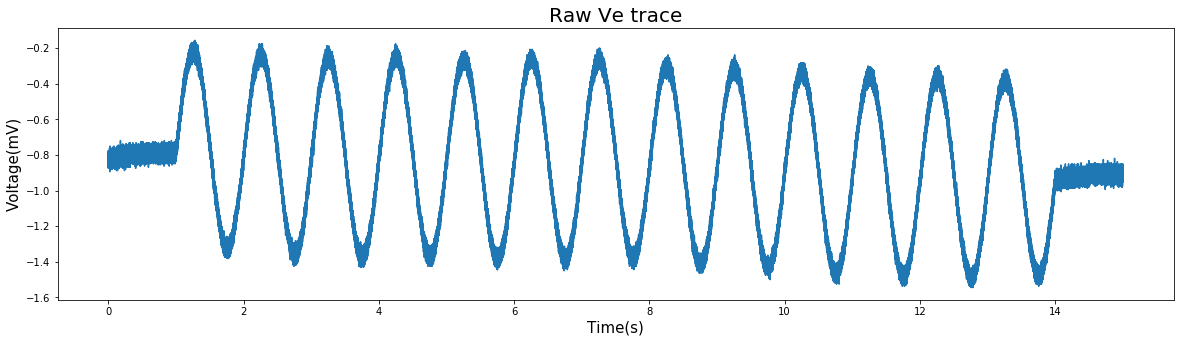

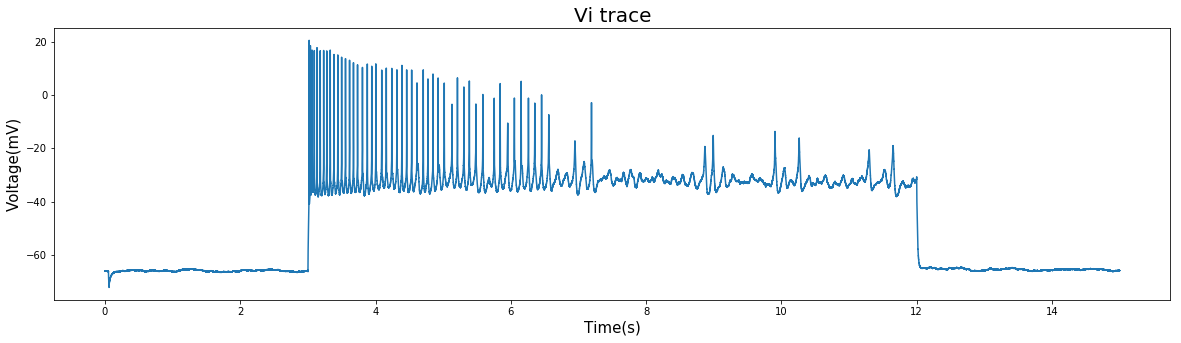

in the table there are 41 spikes for this sweep


In [10]:
sweep = 57
ex_el_id = 7
in_el_id = 5 

# Reading the Vext 
v = xu.read_trace_from_nwb(experiment_id, sampling_freq,  sweep, ex_el_id, saved_data)
tpl.plot_nwb_trace(v, sampling_freq, title="Raw Ve trace")


# Reading the Vi
v = xu.read_trace_from_nwb(experiment_id, sampling_freq,  sweep, in_el_id, saved_data)
tpl.plot_nwb_trace(v, sampling_freq, title="Vi trace")
plt.show()

print "in the table there are", table[(table['sweep_number'] == sweep) & (table['ex_el_id'] == ex_el_id)]["num_spikes"][0] ,"spikes for this sweep" 

# Let's do some checks on the table
## 1- Check the presence of spike in the table and compare it with the raw data
You can use the table to get the extracellular and intracellular electrode_id and then use that to get the raw data from nwb file and check for example to see if in the table there is spike for a specific sweep, do the raw data also shows correctly if there is spike. For example in the below, we can look at sweep=181, which has extracellular_electrode_id = 7 and intracellular_electrode_id =5. In the table, we see that sweep, has spikes. Now we want to look at the raw trace and see if there is spike.

In [12]:
s = table['sweep_number'].unique()

In [14]:
# ex_el_id = [table['ex_el_id'].unique()[0]]
# in_el_id = [table['in_el_id'].unique()[0]]  


# for sweep in s:
#     for ex_el in ex_el_id:
#         v = xu.read_trace_from_nwb(experiment_id, sampling_freq,  int(sweep), ex_el, saved_data)
#         v = xu.read_trace_from_nwb(experiment_id, sampling_freq,  int(sweep), in_el_id[0], saved_data)
    
# print "All the simulus descriptions are correct"

In [15]:
table[table['num_spikes']>0]

,sweep_number,ex_el_id,stim_el_id,in_el_id,ex_el_distance(mu),spike_tt,ex_amp(nA),ex_frequency,ex_dur(ms),ex_delay(ms),...,vi_phase,vm_amp(mV),vm_phase,avg_vm(mV),spike_phase,spike_tt_A,spike_phase_A,num_spikes,num_spikes_A,spike_phase_A_corrected
57_56_4_0_1_160,56.0,4.0,2.0,5.0,100.0,"[3017.92, 3037.42, 3062.32, 3096.1, 3138.2, 31...",0.0,1.0,13000.0,1000.0,...,NaN,NaN,NaN,NaN,"[1.66402874811, 1.75603087004, 1.9231014082, 2...","[3554.42, 3616.14, 3678.34, 3755.3, 3829.5, 39...","[-1.29088284328, -0.921483538708, -0.506154898...",24,13,"[3.42150613711, 3.79090544168, 4.20623408141, ..."
58_56_4_0_5_160,56.0,4.0,2.0,5.0,100.0,"[3017.92, 3037.42, 3062.32, 3096.1, 3138.2, 31...",0.0,5.0,13000.0,1000.0,...,NaN,NaN,NaN,NaN,"[2.06689208287, 2.74213583057, -2.76453274137,...","[3554.42, 3616.14, 3678.34, 3755.3, 3829.5, 39...","[0.107559163769, 1.98144595021, -2.3261078168,...",24,13,"[4.81994814415, 0.410649623418, 2.38628116358,..."
59_56_4_0_9_160,56.0,4.0,2.0,5.0,100.0,"[3017.92, 3037.42, 3062.32, 3096.1, 3138.2, 31...",0.0,9.0,13000.0,1000.0,...,NaN,NaN,NaN,NaN,"[2.52350255119, -2.59204713256, -1.16316326171...","[3554.42, 3616.14, 3678.34, 3755.3, 3829.5, 39...","[1.47246493208, -1.36735969132, 2.15836872378,...",24,13,"[6.18485391246, 3.34502928906, 0.587572396986,..."
60_56_4_0_31_160,56.0,4.0,2.0,5.0,100.0,"[3017.92, 3037.42, 3062.32, 3096.1, 3138.2, 31...",0.0,31.0,13000.0,1000.0,...,NaN,NaN,NaN,NaN,"[-1.23522230019, 2.46105315968, 1.09511606772,...","[3554.42, 3616.14, 3678.34, 3755.3, 3829.5, 39...","[2.70641089669, 2.15947218496, 1.70449543306, ...",24,13,"[1.1356145699, 0.588675858166, 0.133699106261,..."
57_56_7_0_1_160,56.0,7.0,2.0,5.0,50.0,"[3017.92, 3037.42, 3062.32, 3096.1, 3138.2, 31...",0.0,1.0,13000.0,1000.0,...,NaN,NaN,NaN,NaN,"[1.64694905194, 1.77346219146, 1.94857703132, ...","[3554.42, 3616.14, 3678.34, 3755.3, 3829.5, 39...","[-1.22973029727, -0.871816129322, -0.467391435...",24,13,"[3.48265868312, 3.84057285106, 4.24499754444, ..."
58_56_7_0_5_160,56.0,7.0,2.0,5.0,50.0,"[3017.92, 3037.42, 3062.32, 3096.1, 3138.2, 31...",0.0,5.0,13000.0,1000.0,...,NaN,NaN,NaN,NaN,"[2.11339898078, 2.72546077375, -2.79722953481,...","[3554.42, 3616.14, 3678.34, 3755.3, 3829.5, 39...","[0.0983702060712, 2.04830296475, -2.2719002116...",24,13,"[4.81075918646, 0.477506637951, 2.44048876871,..."
59_56_7_0_9_160,56.0,7.0,2.0,5.0,50.0,"[3017.92, 3037.42, 3062.32, 3096.1, 3138.2, 31...",0.0,9.0,13000.0,1000.0,...,NaN,NaN,NaN,NaN,"[2.56766548047, -2.64169877518, -1.25125771692...","[3554.42, 3616.14, 3678.34, 3755.3, 3829.5, 39...","[1.44987264306, -1.32244752061, 2.18196165972,...",24,13,"[6.16226162344, 3.38994145977, 0.61116533293, ..."
60_56_7_0_31_160,56.0,7.0,2.0,5.0,50.0,"[3017.92, 3037.42, 3062.32, 3096.1, 3138.2, 31...",0.0,31.0,13000.0,1000.0,...,NaN,NaN,NaN,NaN,"[-1.26809091598, 2.50149592519, 1.10253127196,...","[3554.42, 3616.14, 3678.34, 3755.3, 3829.5, 39...","[2.71350346709, 2.1503641015, 1.70075843149, -...",24,13,"[1.1427071403, 0.579567774708, 0.129962104693,..."
57_4_100_1_160,57.0,4.0,2.0,5.0,100.0,"[3016.94, 3034.94, 3058.78, 3092.12, 3132.38, ...",100.0,1.0,13000.0,1000.0,...,NaN,NaN,NaN,NaN,"[1.67795373432, 1.76092020442, 1.89386210623, ...","[3553.64, 3613.5, 3671.46, 3731.32, 3804.18, 3...","[-1.29999407459, -0.937353155223, -0.576061265...",41,29,"[3.41239490579, 3.77503582516, 4.13632771525, ..."
57_7_100_1_160,57.0,7.0,2.0,5.0,50.0,"[3016.94, 3034.94, 3058.78, 3092.12, 3132.38, ...",100.0,1.0,13000.0,1000.0,...,NaN,NaN,NaN,NaN,"[1.63448554728, 1.74456347412, 1.89632123612, ...","[3553.64, 3613.5, 3671.46, 3731.32, 3804.18, 3...","[-1.23549732676, -0.876082002371, -0.482057534...",41,29,"[3.47689165362, 3.83630697801, 4.23033144576, ..."


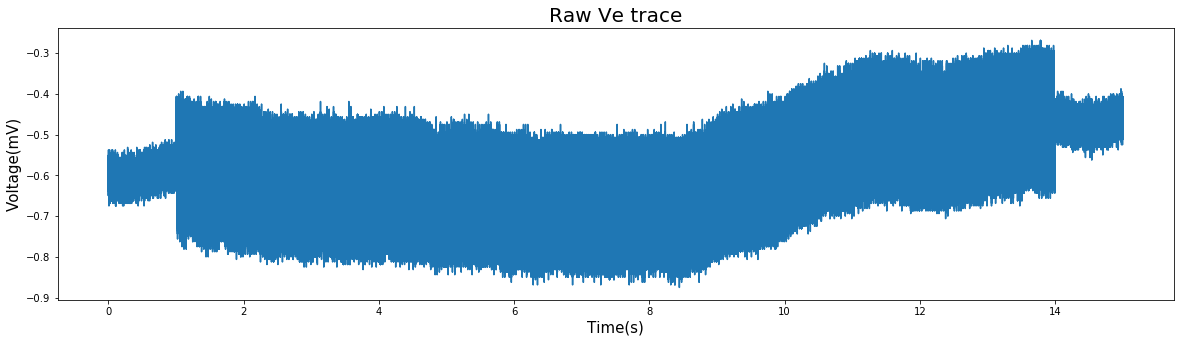

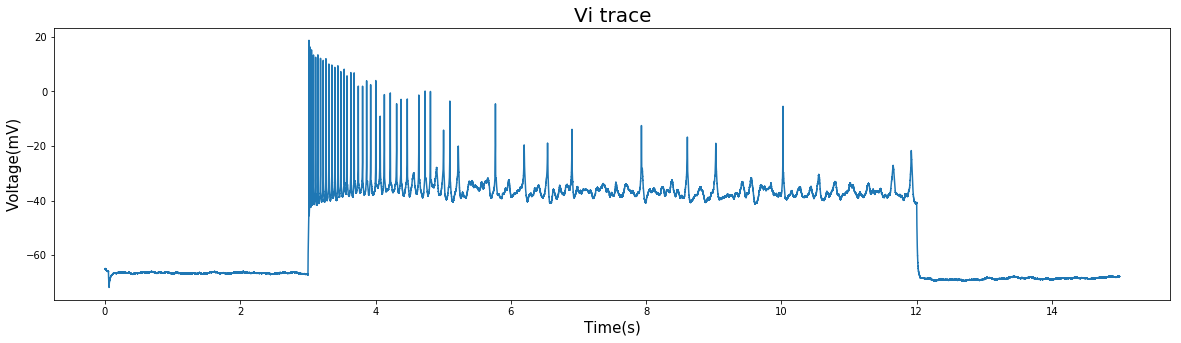

in the table there are 33 spikes for this sweep


In [17]:
sweep = 76
ex_el_id = 7
in_el_id = 5 

# Reading the Vext 
v = xu.read_trace_from_nwb(experiment_id, sampling_freq,  sweep, ex_el_id, saved_data)
tpl.plot_nwb_trace(v, sampling_freq, title="Raw Ve trace")


# Reading the Vi
v = xu.read_trace_from_nwb(experiment_id, sampling_freq,  sweep, in_el_id, saved_data)
tpl.plot_nwb_trace(v, sampling_freq, title="Vi trace")
plt.show()

print "in the table there are", table[(table['sweep_number'] == sweep) & (table['ex_el_id'] == ex_el_id)]["num_spikes"][0] ,"spikes for this sweep" 

#### You can do the above check for different electrodes and see if it shows spike data in the table, the raw data also contains spikes.

## 2- Check the Vext and Vi phase and amplitude
It is important to note that if there is no spike and if there is a sin extracellualr current present, then both Vi and Vext should have amplitude and phase values inside the table. I call an experiment a control, when the extracellualr stimulation is =0. In this case all the values printed below should be NAN. Which means that there is no sin wave anywhere. So the outcome the following test MUST be TRUE. 

In [18]:
table[table['ex_amp(nA)']==0][['vext_amp(mV)', 'vext_phase', 'vi_amp(mV)','vi_phase', 'vm_amp(mV)', 'vm_phase']].isnull().values.all()

True

For all other sweeps except the control, we MUST have values for Vext_amp and Vext_phase, so we MUST get FALSE for the following line:

In [19]:
table[table['ex_amp(nA)']!=0][['vext_amp(mV)', 'vext_phase']].isnull().values.all()

False

However for vi, the vi_amp and vi_phase are computed when the cell is not spiking. So if there is spike, then these values are NAN. so the output of the follwoing test MUST be TRUE.

In [20]:
table[table['num_spikes']>0][['vi_amp(mV)', 'vi_phase']].isnull().values.all()

True

Vm is computed only when there is not spike and only for the closest electrode because Vext of the closest electrode must be used in this function: Vm= Vi- Vext. Therefore the outcome of the following tests must be TRUE.

In [21]:
print table[table['num_spikes']>0][['vm_amp(mV)', 'vm_phase']].isnull().values.all()
print ~table[(table['ex_el_distance(mu)']==50) & (table['num_spikes']==0)][['vm_amp(mV)', 'vm_phase']].isnull().values.all()

True
True


In [23]:
table[(table['num_spikes']>0)]

,sweep_number,ex_el_id,stim_el_id,in_el_id,ex_el_distance(mu),spike_tt,ex_amp(nA),ex_frequency,ex_dur(ms),ex_delay(ms),...,vi_phase,vm_amp(mV),vm_phase,avg_vm(mV),spike_phase,spike_tt_A,spike_phase_A,num_spikes,num_spikes_A,spike_phase_A_corrected
57_56_4_0_1_160,56.0,4.0,2.0,5.0,100.0,"[3017.92, 3037.42, 3062.32, 3096.1, 3138.2, 31...",0.0,1.0,13000.0,1000.0,...,NaN,NaN,NaN,NaN,"[1.66402874811, 1.75603087004, 1.9231014082, 2...","[3554.42, 3616.14, 3678.34, 3755.3, 3829.5, 39...","[-1.29088284328, -0.921483538708, -0.506154898...",24,13,"[3.42150613711, 3.79090544168, 4.20623408141, ..."
58_56_4_0_5_160,56.0,4.0,2.0,5.0,100.0,"[3017.92, 3037.42, 3062.32, 3096.1, 3138.2, 31...",0.0,5.0,13000.0,1000.0,...,NaN,NaN,NaN,NaN,"[2.06689208287, 2.74213583057, -2.76453274137,...","[3554.42, 3616.14, 3678.34, 3755.3, 3829.5, 39...","[0.107559163769, 1.98144595021, -2.3261078168,...",24,13,"[4.81994814415, 0.410649623418, 2.38628116358,..."
59_56_4_0_9_160,56.0,4.0,2.0,5.0,100.0,"[3017.92, 3037.42, 3062.32, 3096.1, 3138.2, 31...",0.0,9.0,13000.0,1000.0,...,NaN,NaN,NaN,NaN,"[2.52350255119, -2.59204713256, -1.16316326171...","[3554.42, 3616.14, 3678.34, 3755.3, 3829.5, 39...","[1.47246493208, -1.36735969132, 2.15836872378,...",24,13,"[6.18485391246, 3.34502928906, 0.587572396986,..."
60_56_4_0_31_160,56.0,4.0,2.0,5.0,100.0,"[3017.92, 3037.42, 3062.32, 3096.1, 3138.2, 31...",0.0,31.0,13000.0,1000.0,...,NaN,NaN,NaN,NaN,"[-1.23522230019, 2.46105315968, 1.09511606772,...","[3554.42, 3616.14, 3678.34, 3755.3, 3829.5, 39...","[2.70641089669, 2.15947218496, 1.70449543306, ...",24,13,"[1.1356145699, 0.588675858166, 0.133699106261,..."
57_56_7_0_1_160,56.0,7.0,2.0,5.0,50.0,"[3017.92, 3037.42, 3062.32, 3096.1, 3138.2, 31...",0.0,1.0,13000.0,1000.0,...,NaN,NaN,NaN,NaN,"[1.64694905194, 1.77346219146, 1.94857703132, ...","[3554.42, 3616.14, 3678.34, 3755.3, 3829.5, 39...","[-1.22973029727, -0.871816129322, -0.467391435...",24,13,"[3.48265868312, 3.84057285106, 4.24499754444, ..."
58_56_7_0_5_160,56.0,7.0,2.0,5.0,50.0,"[3017.92, 3037.42, 3062.32, 3096.1, 3138.2, 31...",0.0,5.0,13000.0,1000.0,...,NaN,NaN,NaN,NaN,"[2.11339898078, 2.72546077375, -2.79722953481,...","[3554.42, 3616.14, 3678.34, 3755.3, 3829.5, 39...","[0.0983702060712, 2.04830296475, -2.2719002116...",24,13,"[4.81075918646, 0.477506637951, 2.44048876871,..."
59_56_7_0_9_160,56.0,7.0,2.0,5.0,50.0,"[3017.92, 3037.42, 3062.32, 3096.1, 3138.2, 31...",0.0,9.0,13000.0,1000.0,...,NaN,NaN,NaN,NaN,"[2.56766548047, -2.64169877518, -1.25125771692...","[3554.42, 3616.14, 3678.34, 3755.3, 3829.5, 39...","[1.44987264306, -1.32244752061, 2.18196165972,...",24,13,"[6.16226162344, 3.38994145977, 0.61116533293, ..."
60_56_7_0_31_160,56.0,7.0,2.0,5.0,50.0,"[3017.92, 3037.42, 3062.32, 3096.1, 3138.2, 31...",0.0,31.0,13000.0,1000.0,...,NaN,NaN,NaN,NaN,"[-1.26809091598, 2.50149592519, 1.10253127196,...","[3554.42, 3616.14, 3678.34, 3755.3, 3829.5, 39...","[2.71350346709, 2.1503641015, 1.70075843149, -...",24,13,"[1.1427071403, 0.579567774708, 0.129962104693,..."
57_4_100_1_160,57.0,4.0,2.0,5.0,100.0,"[3016.94, 3034.94, 3058.78, 3092.12, 3132.38, ...",100.0,1.0,13000.0,1000.0,...,NaN,NaN,NaN,NaN,"[1.67795373432, 1.76092020442, 1.89386210623, ...","[3553.64, 3613.5, 3671.46, 3731.32, 3804.18, 3...","[-1.29999407459, -0.937353155223, -0.576061265...",41,29,"[3.41239490579, 3.77503582516, 4.13632771525, ..."
57_7_100_1_160,57.0,7.0,2.0,5.0,50.0,"[3016.94, 3034.94, 3058.78, 3092.12, 3132.38, ...",100.0,1.0,13000.0,1000.0,...,NaN,NaN,NaN,NaN,"[1.63448554728, 1.74456347412, 1.89632123612, ...","[3553.64, 3613.5, 3671.46, 3731.32, 3804.18, 3...","[-1.23549732676, -0.876082002371, -0.482057534...",41,29,"[3.47689165362, 3.83630697801, 4.23033144576, ..."


In [28]:
table[table['sweep_number']==71][['vext_amp(mV)', 'vext_phase','vi_amp(mV)', 'vi_phase']]

,vext_amp(mV),vext_phase,vi_amp(mV),vi_phase
71_7_50_31_160,0.255843,356.819883,NaN,NaN
71_4_50_31_160,0.123699,356.394563,NaN,NaN


Here I am checking the phase and amplitude of Vext for one sweep. For this specific sweep, Vi amplitude and phase are NAN becasue the cell is spiking but the Vext amplitude and phase are not NAN and in the below, I show how the values are computed.

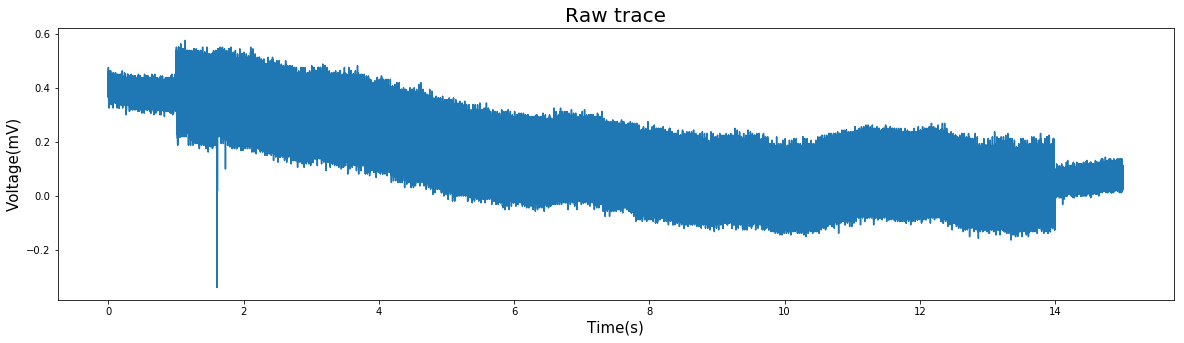

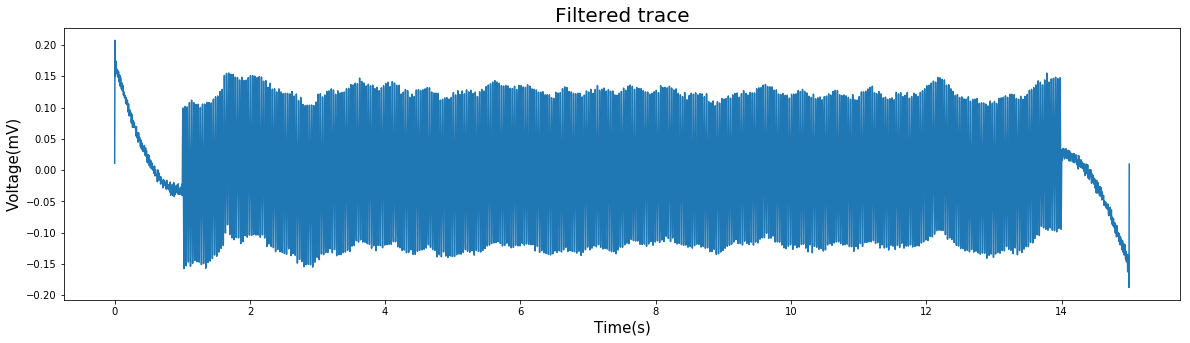

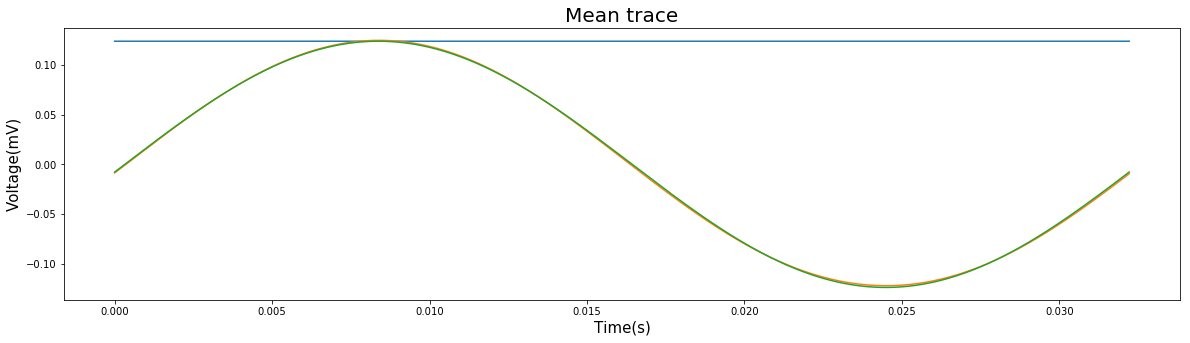

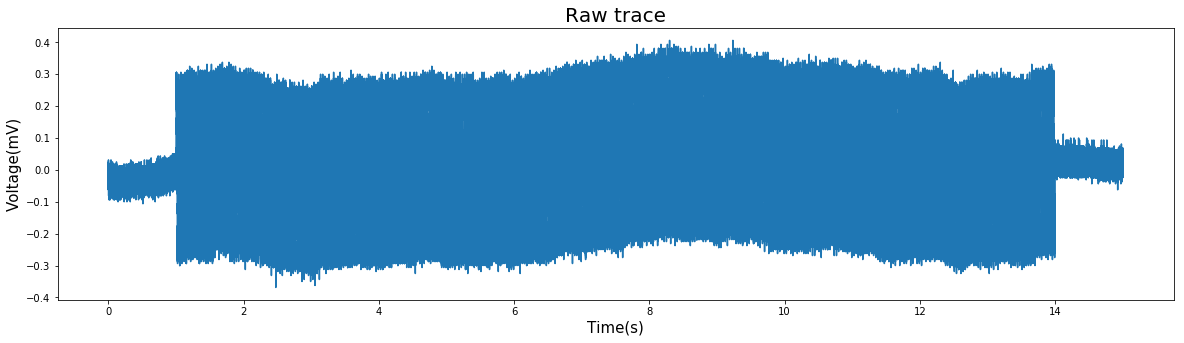

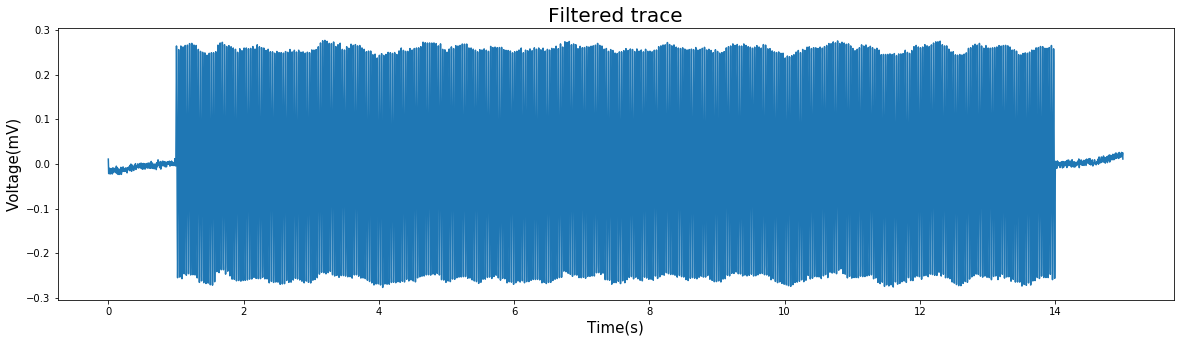

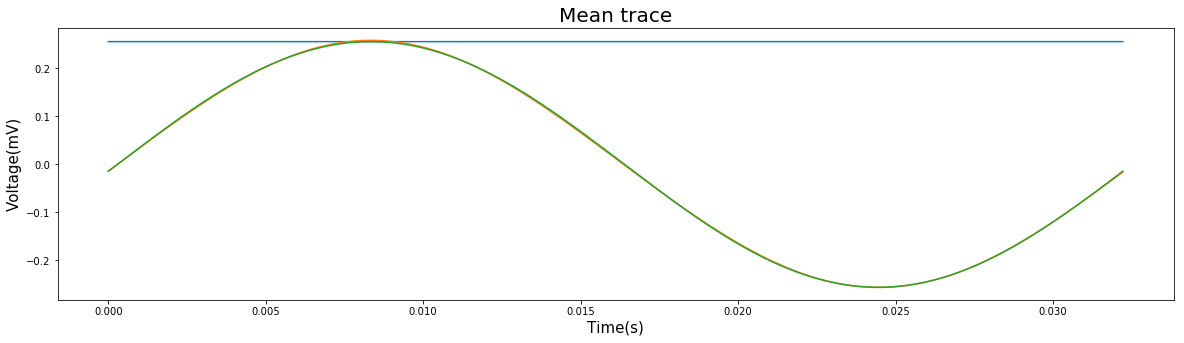

In [24]:
sweep = 71
electrode_id = table['ex_el_id'].unique().tolist()
freq = 31 
ex_dur = 13000
ex_delay = 1000

for el in electrode_id:
    #Find the signal from NWB file
    v = xu.read_trace_from_nwb(experiment_id, sampling_freq,  sweep, el, saved_data)
    #Filter the signal
    fil_v = su.bandpass_filter(v, 0.5, 110, 1./(sampling_freq * 1000.))
    #Plot the signal andfiltered signal
    tpl.plot_nwb_trace(v, 50, title="Raw trace")
    tpl.plot_nwb_trace(fil_v, 50, title="Filtered trace")

    # Compute the mean trace and plot the mean trace and its amplitude
    sin = su.get_fitted_sin(fil_v,ex_delay, ex_dur, freq, 0.02)
    mean_fil_v_trace = su.get_mean_trace(var_trace = fil_v, ex_delay= ex_delay, ex_dur = ex_dur, freq = freq, dt = 0.02) 
    amplitude_line = table[(table['sweep_number']==sweep) & (table['ex_el_id']==el)]['vext_amp(mV)'][0]
    ax1 = tpl.plot_nwb_trace(np.repeat(amplitude_line, len(mean_fil_v_trace)), 50)
    tpl.plot_nwb_trace(mean_fil_v_trace, 50, title="Mean trace", ax= ax1)
    tpl.plot_nwb_trace(sin, 50, ax=ax1)

plt.show()


We can do the same test for another sweep in which Vi is not spiking and therefore we can compute the phase and amplitude if Vi for example the following sweep:

In [31]:
# table[(table['num_spikes']==0)]['in_amp(pA)'].unique()
table[(table['num_spikes']==0) & (table['ex_amp(nA)']!=0)]

,sweep_number,ex_el_id,stim_el_id,in_el_id,ex_el_distance(mu),spike_tt,ex_amp(nA),ex_frequency,ex_dur(ms),ex_delay(ms),...,vi_phase,vm_amp(mV),vm_phase,avg_vm(mV),spike_phase,spike_tt_A,spike_phase_A,num_spikes,num_spikes_A,spike_phase_A_corrected
77_4_100_8_-90,77.0,4.0,2.0,5.0,100.0,[],100.0,8.0,9000.0,1000.0,...,352.905642,NaN,NaN,NaN,[],[],[],0,0,[]
77_7_100_8_-90,77.0,7.0,2.0,5.0,50.0,[],100.0,8.0,9000.0,1000.0,...,352.905642,0.275779,183.244689,-94.042435,[],[],[],0,0,[]
78_4_100_8_-60,78.0,4.0,2.0,5.0,100.0,[],100.0,8.0,9000.0,1000.0,...,347.158993,NaN,NaN,NaN,[],[],[],0,0,[]
78_7_100_8_-60,78.0,7.0,2.0,5.0,50.0,[],100.0,8.0,9000.0,1000.0,...,347.158993,0.286936,188.641455,-84.098824,[],[],[],0,0,[]
79_4_100_8_-30,79.0,4.0,2.0,5.0,100.0,[],100.0,8.0,9000.0,1000.0,...,353.931537,NaN,NaN,NaN,[],[],[],0,0,[]
79_7_100_8_-30,79.0,7.0,2.0,5.0,50.0,[],100.0,8.0,9000.0,1000.0,...,353.931537,0.254411,183.000060,-76.344101,[],[],[],0,0,[]
80_4_100_8_0,80.0,4.0,2.0,5.0,100.0,[],100.0,8.0,9000.0,1000.0,...,354.103739,NaN,NaN,NaN,[],[],[],0,0,[]
80_7_100_8_0,80.0,7.0,2.0,5.0,50.0,[],100.0,8.0,9000.0,1000.0,...,354.103739,0.220992,183.997640,-66.952286,[],[],[],0,0,[]
81_4_100_8_30,81.0,4.0,2.0,5.0,100.0,[],100.0,8.0,9000.0,1000.0,...,352.564296,NaN,NaN,NaN,[],[],[],0,0,[]
81_7_100_8_30,81.0,7.0,2.0,5.0,50.0,[],100.0,8.0,9000.0,1000.0,...,352.564296,0.251513,184.766101,-56.036846,[],[],[],0,0,[]


In [35]:
sweep = 79
ex_electrode_id = 7
print table[(table['sweep_number']==sweep) & (table['ex_el_id']==ex_electrode_id)]['vm_amp(mV)'][0]
print table[(table['sweep_number']==sweep) & (table['ex_el_id']==ex_electrode_id)]['vi_amp(mV)'][0]


0.254410808048
0.307637243192


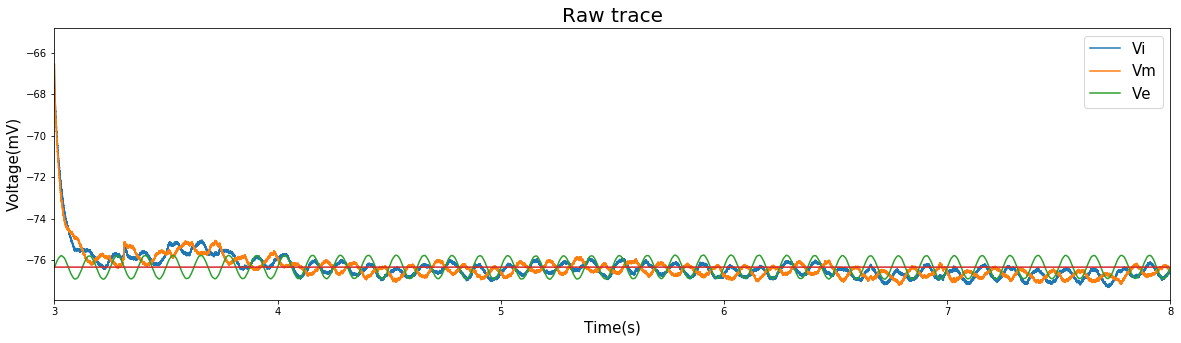

In [36]:
sweep = 79
in_electrode_id = 5 
ex_electrode_id = 7
freq = 8 
ex_dur = 9000
ex_delay = 1000


#Find the signal from NWB file
vi = xu.read_trace_from_nwb(experiment_id, sampling_freq,  sweep, in_electrode_id, saved_data)

ve = xu.read_trace_from_nwb(experiment_id, sampling_freq,  sweep, ex_electrode_id, saved_data)
fil_ve = su.bandpass_filter(ve, 0.5, 110, 1./(sampling_freq * 1000.))

vm =  vi - (fil_ve- np.mean(fil_ve))

amplitude_line = table[(table['sweep_number']==sweep) & (table['ex_el_id']==ex_electrode_id)]['avg_vm(mV)'][0]
ax = tpl.plot_nwb_trace(vi, 50, title="Raw trace", label="Vi")
tpl.plot_nwb_trace(vm, 50,  ax=ax, label="Vm")
tpl.plot_nwb_trace(fil_ve+amplitude_line, 50,  ax=ax, label="Ve")
tpl.plot_nwb_trace(np.repeat(amplitude_line, len(vm)), 50,  ax=ax)
# plt.ylim(amplitude_line-3, amplitude_line+3)
plt.xlim(3,8)
plt.show()


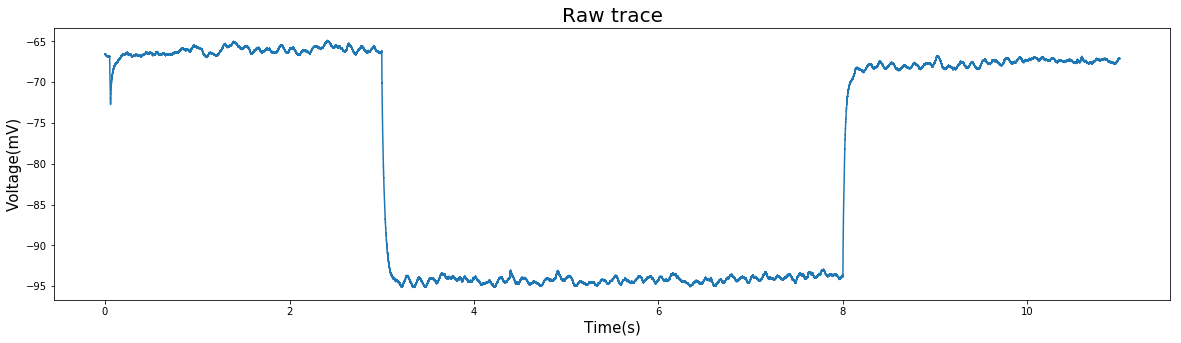

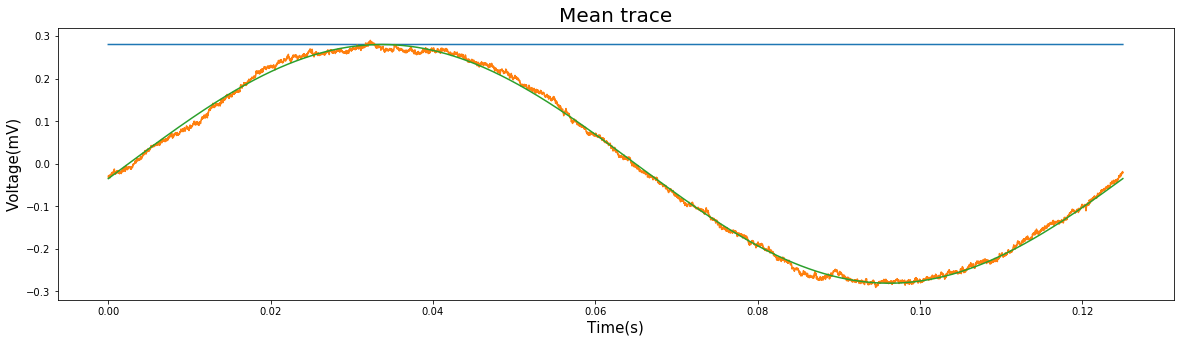

In [39]:
sweep = 77
in_electrode_id = 5 
freq = 8
ex_dur = 9000
ex_delay = 1000


#Find the signal from NWB file
v = xu.read_trace_from_nwb(experiment_id, sampling_freq,  sweep, in_electrode_id, saved_data)
tpl.plot_nwb_trace(v, 50, title="Raw trace")
plt.show()

# Compute the mean trace and plot the mean trace and its amplitude
sin = su.get_fitted_sin(v,ex_delay, ex_dur, freq, 0.02)
mean_fil_v_trace = su.get_mean_trace(var_trace = v, ex_delay= ex_delay, ex_dur = ex_dur, freq = freq, dt = 0.02) 
amplitude_line = table[(table['sweep_number']==sweep) & (table['in_el_id']==in_electrode_id)]['vi_amp(mV)'][0]
ax1 = tpl.plot_nwb_trace(np.repeat(amplitude_line, len(mean_fil_v_trace)), 50)
tpl.plot_nwb_trace(mean_fil_v_trace, 50, title="Mean trace", ax= ax1)
tpl.plot_nwb_trace(sin, 50, ax=ax1)
plt.show()

In [40]:
table[table['sweep_number']==77][['vext_amp(mV)', 'vext_phase','vi_amp(mV)', 'vi_phase']]

,vext_amp(mV),vext_phase,vi_amp(mV),vi_phase
77_4_100_8_-90,0.272079,356.984992,0.28057,352.905642
77_7_100_8_-90,0.554086,358.030517,0.28057,352.905642


## 3- Check the Spike phase


In [41]:
table[table['num_spikes']>0]

,sweep_number,ex_el_id,stim_el_id,in_el_id,ex_el_distance(mu),spike_tt,ex_amp(nA),ex_frequency,ex_dur(ms),ex_delay(ms),...,vi_phase,vm_amp(mV),vm_phase,avg_vm(mV),spike_phase,spike_tt_A,spike_phase_A,num_spikes,num_spikes_A,spike_phase_A_corrected
57_56_4_0_1_160,56.0,4.0,2.0,5.0,100.0,"[3017.92, 3037.42, 3062.32, 3096.1, 3138.2, 31...",0.0,1.0,13000.0,1000.0,...,NaN,NaN,NaN,NaN,"[1.66402874811, 1.75603087004, 1.9231014082, 2...","[3554.42, 3616.14, 3678.34, 3755.3, 3829.5, 39...","[-1.29088284328, -0.921483538708, -0.506154898...",24,13,"[3.42150613711, 3.79090544168, 4.20623408141, ..."
58_56_4_0_5_160,56.0,4.0,2.0,5.0,100.0,"[3017.92, 3037.42, 3062.32, 3096.1, 3138.2, 31...",0.0,5.0,13000.0,1000.0,...,NaN,NaN,NaN,NaN,"[2.06689208287, 2.74213583057, -2.76453274137,...","[3554.42, 3616.14, 3678.34, 3755.3, 3829.5, 39...","[0.107559163769, 1.98144595021, -2.3261078168,...",24,13,"[4.81994814415, 0.410649623418, 2.38628116358,..."
59_56_4_0_9_160,56.0,4.0,2.0,5.0,100.0,"[3017.92, 3037.42, 3062.32, 3096.1, 3138.2, 31...",0.0,9.0,13000.0,1000.0,...,NaN,NaN,NaN,NaN,"[2.52350255119, -2.59204713256, -1.16316326171...","[3554.42, 3616.14, 3678.34, 3755.3, 3829.5, 39...","[1.47246493208, -1.36735969132, 2.15836872378,...",24,13,"[6.18485391246, 3.34502928906, 0.587572396986,..."
60_56_4_0_31_160,56.0,4.0,2.0,5.0,100.0,"[3017.92, 3037.42, 3062.32, 3096.1, 3138.2, 31...",0.0,31.0,13000.0,1000.0,...,NaN,NaN,NaN,NaN,"[-1.23522230019, 2.46105315968, 1.09511606772,...","[3554.42, 3616.14, 3678.34, 3755.3, 3829.5, 39...","[2.70641089669, 2.15947218496, 1.70449543306, ...",24,13,"[1.1356145699, 0.588675858166, 0.133699106261,..."
57_56_7_0_1_160,56.0,7.0,2.0,5.0,50.0,"[3017.92, 3037.42, 3062.32, 3096.1, 3138.2, 31...",0.0,1.0,13000.0,1000.0,...,NaN,NaN,NaN,NaN,"[1.64694905194, 1.77346219146, 1.94857703132, ...","[3554.42, 3616.14, 3678.34, 3755.3, 3829.5, 39...","[-1.22973029727, -0.871816129322, -0.467391435...",24,13,"[3.48265868312, 3.84057285106, 4.24499754444, ..."
58_56_7_0_5_160,56.0,7.0,2.0,5.0,50.0,"[3017.92, 3037.42, 3062.32, 3096.1, 3138.2, 31...",0.0,5.0,13000.0,1000.0,...,NaN,NaN,NaN,NaN,"[2.11339898078, 2.72546077375, -2.79722953481,...","[3554.42, 3616.14, 3678.34, 3755.3, 3829.5, 39...","[0.0983702060712, 2.04830296475, -2.2719002116...",24,13,"[4.81075918646, 0.477506637951, 2.44048876871,..."
59_56_7_0_9_160,56.0,7.0,2.0,5.0,50.0,"[3017.92, 3037.42, 3062.32, 3096.1, 3138.2, 31...",0.0,9.0,13000.0,1000.0,...,NaN,NaN,NaN,NaN,"[2.56766548047, -2.64169877518, -1.25125771692...","[3554.42, 3616.14, 3678.34, 3755.3, 3829.5, 39...","[1.44987264306, -1.32244752061, 2.18196165972,...",24,13,"[6.16226162344, 3.38994145977, 0.61116533293, ..."
60_56_7_0_31_160,56.0,7.0,2.0,5.0,50.0,"[3017.92, 3037.42, 3062.32, 3096.1, 3138.2, 31...",0.0,31.0,13000.0,1000.0,...,NaN,NaN,NaN,NaN,"[-1.26809091598, 2.50149592519, 1.10253127196,...","[3554.42, 3616.14, 3678.34, 3755.3, 3829.5, 39...","[2.71350346709, 2.1503641015, 1.70075843149, -...",24,13,"[1.1427071403, 0.579567774708, 0.129962104693,..."
57_4_100_1_160,57.0,4.0,2.0,5.0,100.0,"[3016.94, 3034.94, 3058.78, 3092.12, 3132.38, ...",100.0,1.0,13000.0,1000.0,...,NaN,NaN,NaN,NaN,"[1.67795373432, 1.76092020442, 1.89386210623, ...","[3553.64, 3613.5, 3671.46, 3731.32, 3804.18, 3...","[-1.29999407459, -0.937353155223, -0.576061265...",41,29,"[3.41239490579, 3.77503582516, 4.13632771525, ..."
57_7_100_1_160,57.0,7.0,2.0,5.0,50.0,"[3016.94, 3034.94, 3058.78, 3092.12, 3132.38, ...",100.0,1.0,13000.0,1000.0,...,NaN,NaN,NaN,NaN,"[1.63448554728, 1.74456347412, 1.89632123612, ...","[3553.64, 3613.5, 3671.46, 3731.32, 3804.18, 3...","[-1.23549732676, -0.876082002371, -0.482057534...",41,29,"[3.47689165362, 3.83630697801, 4.23033144576, ..."


In [42]:
table[table['sweep_number']==65]

,sweep_number,ex_el_id,stim_el_id,in_el_id,ex_el_distance(mu),spike_tt,ex_amp(nA),ex_frequency,ex_dur(ms),ex_delay(ms),...,vi_phase,vm_amp(mV),vm_phase,avg_vm(mV),spike_phase,spike_tt_A,spike_phase_A,num_spikes,num_spikes_A,spike_phase_A_corrected
65_4_200_9_160,65.0,4.0,2.0,5.0,100.0,"[3019.54, 3036.52, 3060.56, 3092.28, 3130.06, ...",200.0,9.0,13000.0,1000.0,...,NaN,NaN,NaN,NaN,"[2.61856069591, -2.67629028065, -1.30816466092...","[3533.54, 3595.16, 3650.7, 3712.42, 3774.54, 3...","[0.304355444907, -2.57323166858, 0.63654513537...",34,22,"[5.01674442529, 2.13915731181, 5.34893411575, ..."
65_7_200_9_160,65.0,7.0,2.0,5.0,50.0,"[3019.54, 3036.52, 3060.56, 3092.28, 3130.06, ...",200.0,9.0,13000.0,1000.0,...,NaN,NaN,NaN,NaN,"[2.63299779457, -2.70276264349, -1.33945186631...","[3533.54, 3595.16, 3650.7, 3712.42, 3774.54, 3...","[0.267609680207, -2.49203694736, 0.60828900482...",34,22,"[4.97999866059, 2.22035203303, 5.32067798521, ..."


First, lets look at the filtered signal and the hilbert phase for all the extracellular electrodes for one sweep.

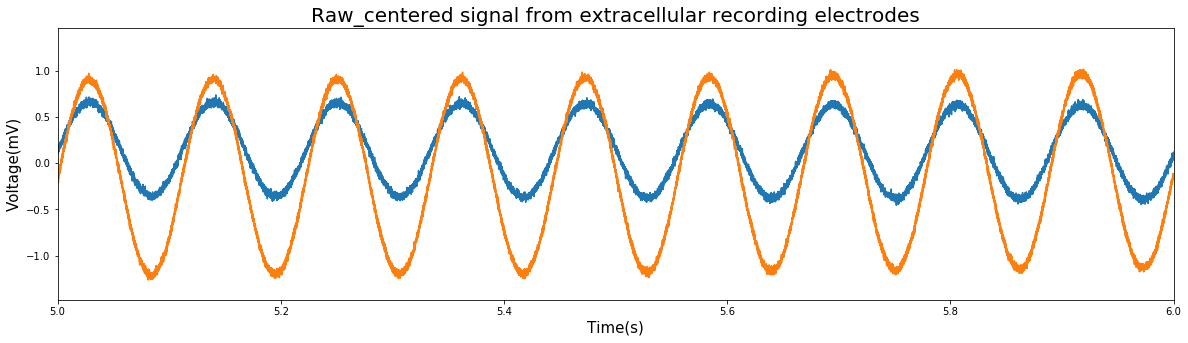

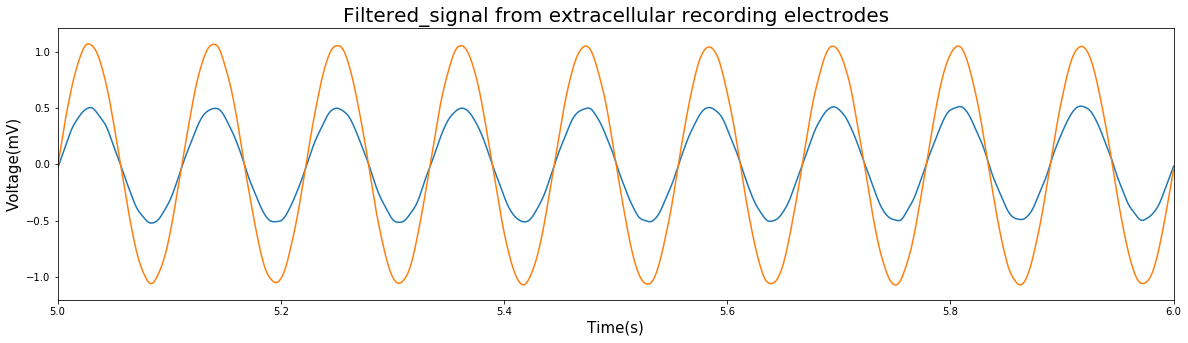

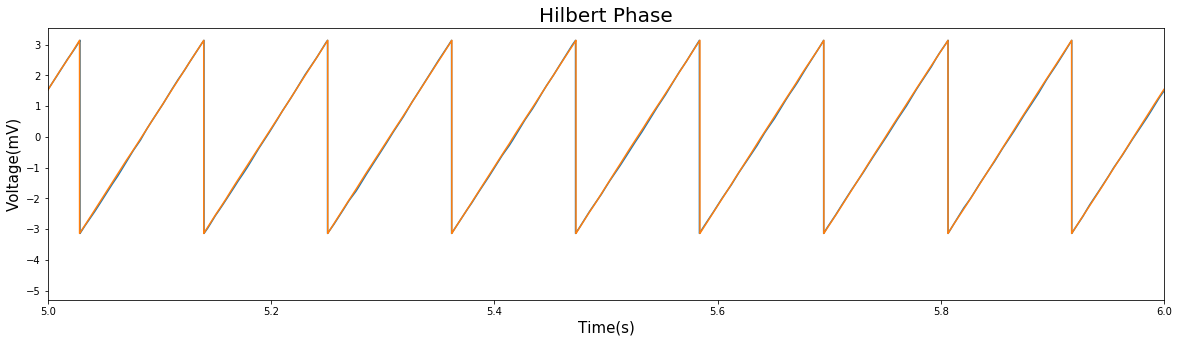

In [46]:
sweep = 65
electrode_id = table['ex_el_id'].unique().tolist()
# freq = 9
ex_dur = 13000
ex_delay = 1000

ax0 = plt.figure(figsize=(20,5))
ax0 = plt.subplot(111)

ax1 = plt.figure(figsize=(20,5))
ax1 = plt.subplot(111)

ax2 = plt.figure(figsize=(20,5))
ax2 = plt.subplot(111)


for el in electrode_id:
    #Find the signal from NWB file
    v = xu.read_trace_from_nwb(experiment_id, sampling_freq,  sweep, el, saved_data)
    tpl.plot_nwb_trace(v - np.mean(v), 50, ax= ax0, title= "Raw_centered signal from extracellular recording electrodes")

    #Filter the signal
    fil_v = su.bandpass_filter(v, 0.5, 110, 1./(sampling_freq * 1000.))
    tpl.plot_nwb_trace(fil_v, 50, ax= ax1, title= "Filtered_signal from extracellular recording electrodes")
    #Apply hilber on the filtered signal
    phase_var, amp_var, freq_var =bt.hilbert_transform_expr(fil_v, ex_delay, ex_dur, 0.02)
    tpl.plot_nwb_trace(phase_var, 50, ax= ax2, title= "Hilbert Phase")

ax0.set_xlim(5,6)
ax1.set_xlim(5,6)
ax2.set_xlim(5,6)
plt.show()
    

####  The plot above shows that the hilbert phase is slightly different for different extracellular recording electrodes
This means that the spike phase is also going to be different depending which electrode we choose to perform the spike phase analysis. Below, I am just plotting all the spike phase values computed using hilbert transorm of each of extracellular recording electrodes.

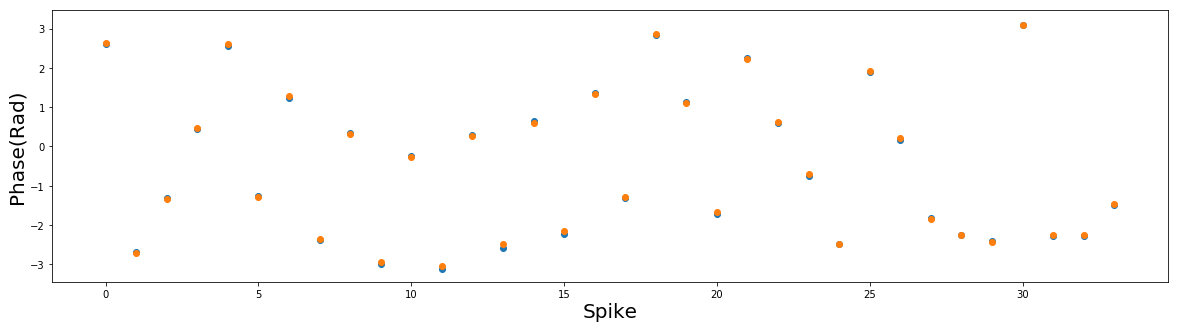

In [47]:
sp0 = table[table['sweep_number']==65]['spike_phase'][0]
sp1 = table[table['sweep_number']==65]['spike_phase'][1]
# sp2 = table[table['sweep_number']==163]['spike_phase'][2]
# sp3 = table[table['sweep_number']==163]['spike_phase'][3]
plt.figure(figsize=(20,5))
plt.scatter(np.arange(0,len(sp0)),sp0)
plt.scatter(np.arange(0,len(sp1)),sp1)
# plt.scatter(np.arange(0,len(sp2)),sp2)
# plt.scatter(np.arange(0,len(sp3)),sp3)
plt.ylabel('Phase(Rad)', size=20)
plt.xlabel('Spike', size=20)
plt.show()

#### But anyway, we would like to check if the values computed for spike phase are correct. If everything is fine, then all the scatter points in the plots below MUST cross the orange lines.

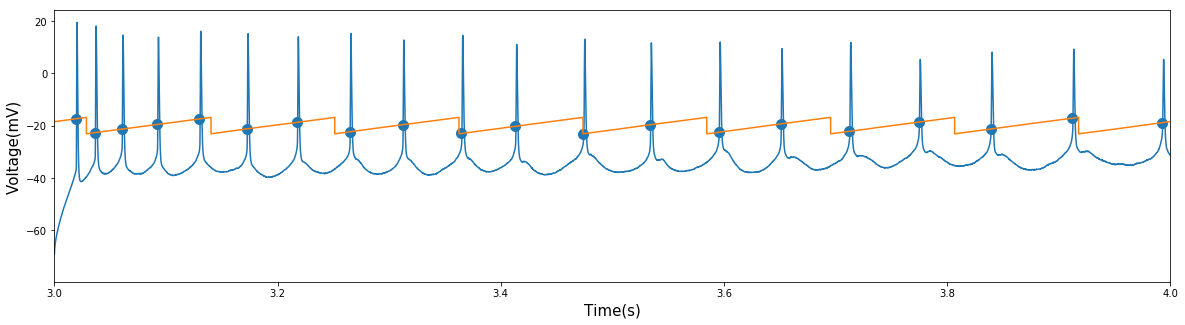

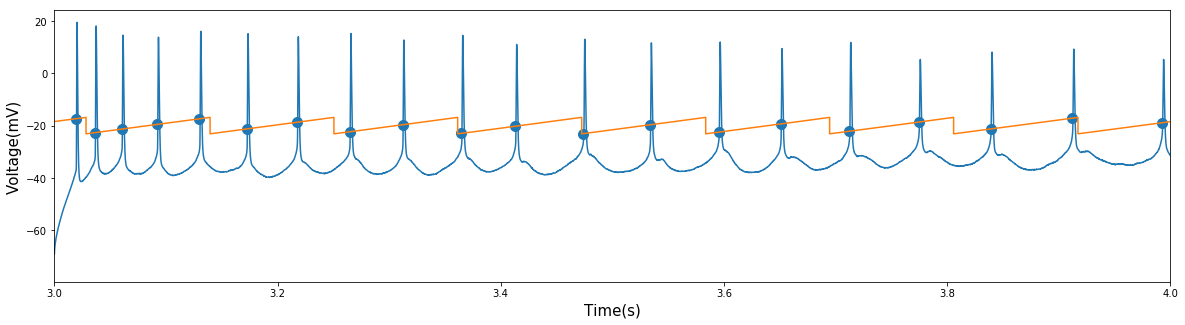

In [52]:
sweep = 65
ex_electrode_id = table['ex_el_id'].unique().tolist()
in_electrode_id = 5
# freq = 31
ex_dur = 13000
ex_delay = 1000
lowcut_freq = 0.5
highcut_freq = 110
dt = 0.02 #ms


for el in ex_electrode_id:
    vi = xu.read_trace_from_nwb(experiment_id, sampling_freq,  sweep, in_electrode_id, saved_data)
    ax = plt.figure(figsize=(20,5))
    ax = plt.subplot(111)
    tpl.plot_nwb_trace(vi, 50, ax= ax)   

    vext = xu.read_trace_from_nwb(experiment_id, sampling_freq,  sweep, el, saved_data)
    filtered_vext = su.bandpass_filter(vext, lowcut_freq, highcut_freq, dt * 0.001)
    phase_var, b, c = bt.hilbert_transform_expr(filtered_vext, ex_delay, ex_dur, dt)
    N = len(phase_var)
    time_step = 1. / (sampling_freq * 1000)
    tstop = (ex_delay + ex_dur)/1000.
    time = np.arange(ex_delay/1000.,tstop , time_step)

    ax.plot(time, [pv - 20. for pv in phase_var])
    spike_tt = table[(table['sweep_number'] == sweep) & (table['ex_el_id']==el)]['spike_tt'][0]
    spike_phase = table[(table['sweep_number'] == sweep) & (table['ex_el_id']==el)]['spike_phase'][0]
    ax.scatter(spike_tt / 1000. , [sp -20 for sp in spike_phase], s=100)
    
    ax.set_xlim(3, 4)
    plt.show()

We corrected the phase and brought all the values between 0 and 2pi. In the figure below, all the points must cross the orange line and also must be at the spike time. We also got rid of all the spikes below 3.5s.

4.0


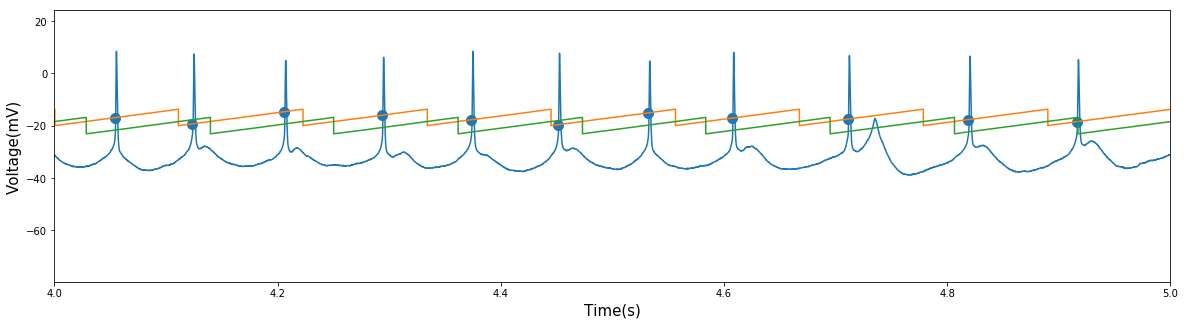

7.0


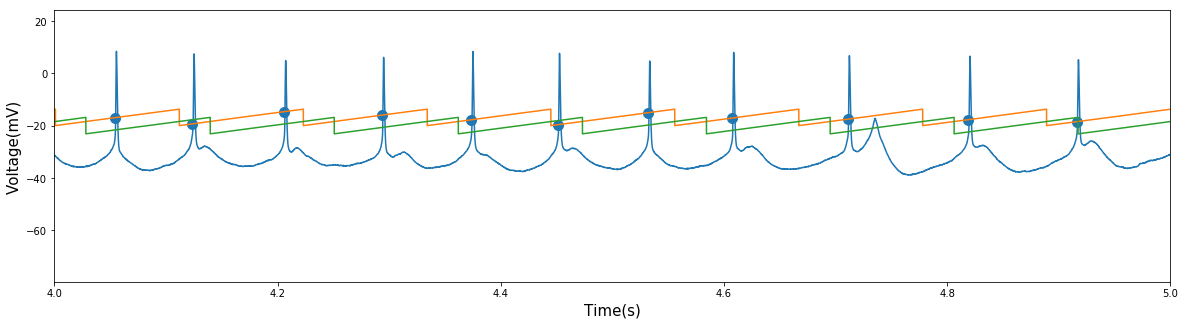

In [57]:
sweep = 65
ex_electrode_id = table['ex_el_id'].unique().tolist()
in_electrode_id = 5
# freq = 31
ex_dur = 13000
ex_delay = 1000
lowcut_freq = 0.5
highcut_freq = 200
dt = 0.02 #ms


for el in ex_electrode_id:
    print el
    vi = xu.read_trace_from_nwb(experiment_id, sampling_freq,  sweep, in_electrode_id, saved_data)
    ax = plt.figure(figsize=(20,5))
    ax = plt.subplot(111)
    tpl.plot_nwb_trace(vi, 50, ax= ax)   

    vext = xu.read_trace_from_nwb(experiment_id, sampling_freq,  sweep, el, saved_data)
    filtered_vext = su.bandpass_filter(vext, lowcut_freq, highcut_freq, dt * 0.001)
    phase_var, b, c = bt.hilbert_transform_expr(filtered_vext, ex_delay, ex_dur, dt)
    temp = [x + (1.5 * np.pi) for x in phase_var]
    corrected_phase = [(x/(2*np.pi) - int(x/(2*np.pi))) * 2 * np.pi for x in temp]
    
    N = len(phase_var)
    time_step = 1. / (sampling_freq * 1000)
    tstop = (ex_delay + ex_dur)/1000.
    time = np.arange(ex_delay/1000.,tstop , time_step)

    ax.plot(time, [pv - 20. for pv in corrected_phase])
    ax.plot(time, [pv - 20. for pv in phase_var])

    spike_tt = table[(table['sweep_number'] == sweep) & (table['ex_el_id']==el)]['spike_tt_A'][0]
    spike_phase = table[(table['sweep_number'] == sweep) & (table['ex_el_id']==el)]['spike_phase_A_corrected'][0]
    ax.scatter([stt/1000. for stt in spike_tt] , [sp -20 for sp in spike_phase], s=100)
    
    ax.set_xlim(4, 5)
    plt.show()

# Spike phase analysis for one of the conrol experiments

In [59]:
table[table['ex_amp(nA)']==0]

,sweep_number,ex_el_id,stim_el_id,in_el_id,ex_el_distance(mu),spike_tt,ex_amp(nA),ex_frequency,ex_dur(ms),ex_delay(ms),...,vi_phase,vm_amp(mV),vm_phase,avg_vm(mV),spike_phase,spike_tt_A,spike_phase_A,num_spikes,num_spikes_A,spike_phase_A_corrected
57_56_4_0_1_160,56.0,4.0,2.0,5.0,100.0,"[3017.92, 3037.42, 3062.32, 3096.1, 3138.2, 31...",0.0,1.0,13000.0,1000.0,...,NaN,NaN,NaN,NaN,"[1.66402874811, 1.75603087004, 1.9231014082, 2...","[3554.42, 3616.14, 3678.34, 3755.3, 3829.5, 39...","[-1.29088284328, -0.921483538708, -0.506154898...",24,13,"[3.42150613711, 3.79090544168, 4.20623408141, ..."
58_56_4_0_5_160,56.0,4.0,2.0,5.0,100.0,"[3017.92, 3037.42, 3062.32, 3096.1, 3138.2, 31...",0.0,5.0,13000.0,1000.0,...,NaN,NaN,NaN,NaN,"[2.06689208287, 2.74213583057, -2.76453274137,...","[3554.42, 3616.14, 3678.34, 3755.3, 3829.5, 39...","[0.107559163769, 1.98144595021, -2.3261078168,...",24,13,"[4.81994814415, 0.410649623418, 2.38628116358,..."
59_56_4_0_9_160,56.0,4.0,2.0,5.0,100.0,"[3017.92, 3037.42, 3062.32, 3096.1, 3138.2, 31...",0.0,9.0,13000.0,1000.0,...,NaN,NaN,NaN,NaN,"[2.52350255119, -2.59204713256, -1.16316326171...","[3554.42, 3616.14, 3678.34, 3755.3, 3829.5, 39...","[1.47246493208, -1.36735969132, 2.15836872378,...",24,13,"[6.18485391246, 3.34502928906, 0.587572396986,..."
60_56_4_0_31_160,56.0,4.0,2.0,5.0,100.0,"[3017.92, 3037.42, 3062.32, 3096.1, 3138.2, 31...",0.0,31.0,13000.0,1000.0,...,NaN,NaN,NaN,NaN,"[-1.23522230019, 2.46105315968, 1.09511606772,...","[3554.42, 3616.14, 3678.34, 3755.3, 3829.5, 39...","[2.70641089669, 2.15947218496, 1.70449543306, ...",24,13,"[1.1356145699, 0.588675858166, 0.133699106261,..."
57_56_7_0_1_160,56.0,7.0,2.0,5.0,50.0,"[3017.92, 3037.42, 3062.32, 3096.1, 3138.2, 31...",0.0,1.0,13000.0,1000.0,...,NaN,NaN,NaN,NaN,"[1.64694905194, 1.77346219146, 1.94857703132, ...","[3554.42, 3616.14, 3678.34, 3755.3, 3829.5, 39...","[-1.22973029727, -0.871816129322, -0.467391435...",24,13,"[3.48265868312, 3.84057285106, 4.24499754444, ..."
58_56_7_0_5_160,56.0,7.0,2.0,5.0,50.0,"[3017.92, 3037.42, 3062.32, 3096.1, 3138.2, 31...",0.0,5.0,13000.0,1000.0,...,NaN,NaN,NaN,NaN,"[2.11339898078, 2.72546077375, -2.79722953481,...","[3554.42, 3616.14, 3678.34, 3755.3, 3829.5, 39...","[0.0983702060712, 2.04830296475, -2.2719002116...",24,13,"[4.81075918646, 0.477506637951, 2.44048876871,..."
59_56_7_0_9_160,56.0,7.0,2.0,5.0,50.0,"[3017.92, 3037.42, 3062.32, 3096.1, 3138.2, 31...",0.0,9.0,13000.0,1000.0,...,NaN,NaN,NaN,NaN,"[2.56766548047, -2.64169877518, -1.25125771692...","[3554.42, 3616.14, 3678.34, 3755.3, 3829.5, 39...","[1.44987264306, -1.32244752061, 2.18196165972,...",24,13,"[6.16226162344, 3.38994145977, 0.61116533293, ..."
60_56_7_0_31_160,56.0,7.0,2.0,5.0,50.0,"[3017.92, 3037.42, 3062.32, 3096.1, 3138.2, 31...",0.0,31.0,13000.0,1000.0,...,NaN,NaN,NaN,NaN,"[-1.26809091598, 2.50149592519, 1.10253127196,...","[3554.42, 3616.14, 3678.34, 3755.3, 3829.5, 39...","[2.71350346709, 2.1503641015, 1.70075843149, -...",24,13,"[1.1427071403, 0.579567774708, 0.129962104693,..."
63_61_4_0_1_160,61.0,4.0,2.0,5.0,100.0,"[3016.86, 3034.86, 3059.9, 3094.14, 3135.7, 31...",0.0,1.0,13000.0,1000.0,...,NaN,NaN,NaN,NaN,"[1.54684348125, 1.64620489406, 1.84786472488, ...","[3524.76, 3587.88, 3657.6, 3725.46, 3790.62, 3...","[-1.51095271272, -1.10340608129, -0.6587070879...",45,34,"[3.20143626767, 3.6089828991, 4.05368189239, 4..."
64_61_4_0_5_160,61.0,4.0,2.0,5.0,100.0,"[3016.86, 3034.86, 3059.9, 3094.14, 3135.7, 31...",0.0,5.0,13000.0,1000.0,...,NaN,NaN,NaN,NaN,"[2.05121571722, 2.61973370355, -2.88556091479,...","[3524.76, 3587.88, 3657.6, 3725.46, 3790.62, 3...","[-0.861876956462, 1.14278837507, -2.9352852782...",45,34,"[3.85051202392, 5.85517735545, 1.77710370214, ..."


In [63]:
table['ex_el_id'].unique().tolist()

[4.0, 7.0]

freq 1


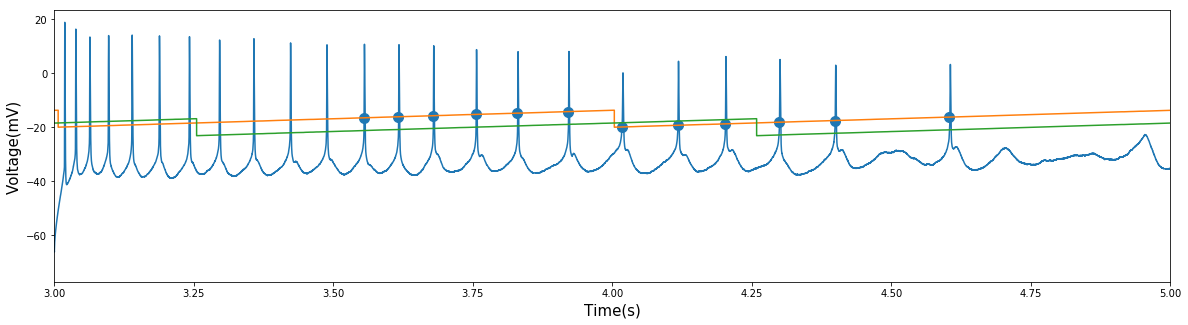

freq 5


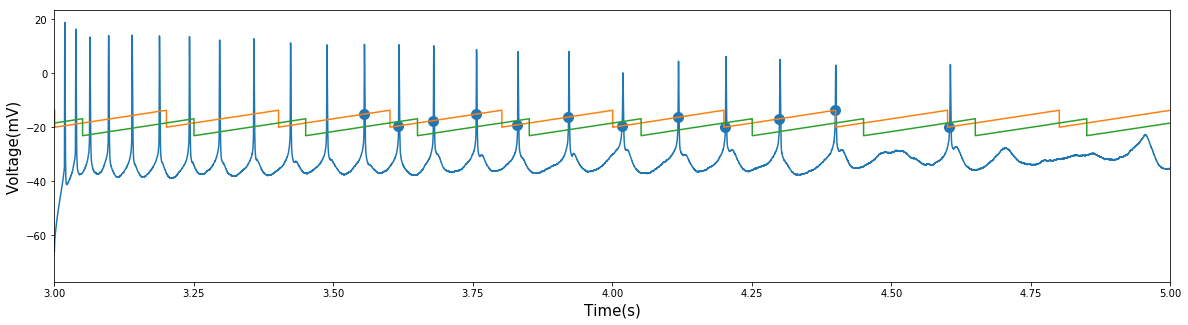

freq 9


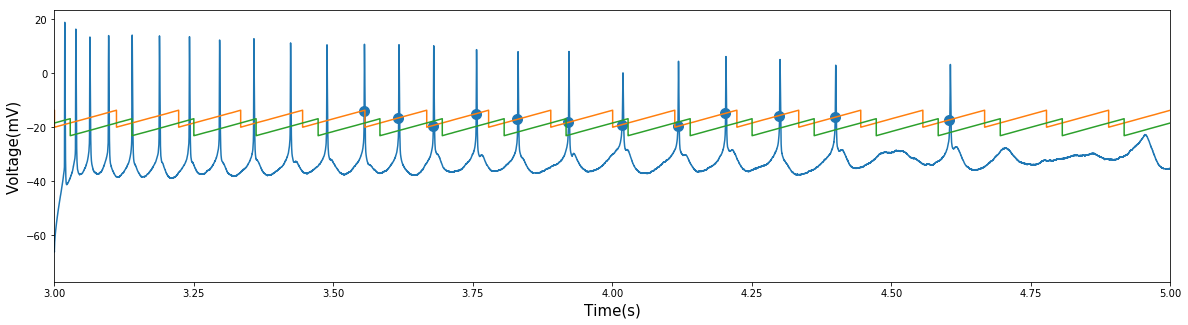

freq 31


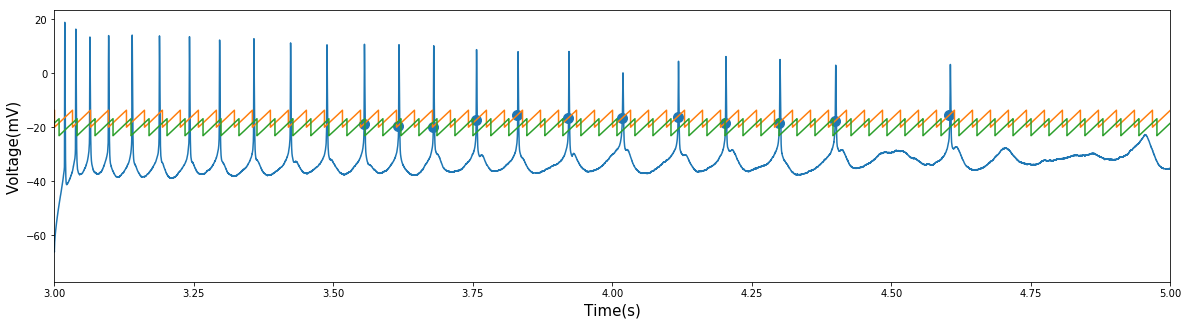

In [64]:
control_sweep = 56
other_sweep = [ 57, 58, 59, 60 ]
freq = [1, 5, 9, 31]
ex_electrode_id = table['ex_el_id'].unique().tolist()[1]
# ex_electrode_id= 4
in_electrode_id = 5
ex_dur = 13000
ex_delay = 1000
lowcut_freq = 0.5
highcut_freq = 200
dt = 0.02 #ms


for s in other_sweep:
        print "freq",freq[other_sweep.index(s)]
        vi = xu.read_trace_from_nwb(experiment_id, sampling_freq,  control_sweep, in_electrode_id, saved_data)
        ax = plt.figure(figsize=(20,5))
        ax = plt.subplot(111)
        tpl.plot_nwb_trace(vi, 50, ax= ax)   
        vext = xu.read_trace_from_nwb(experiment_id, sampling_freq,  s, ex_electrode_id, saved_data)
        filtered_vext = su.bandpass_filter(vext, lowcut_freq, highcut_freq, dt * 0.001)
        phase_var, b, c = bt.hilbert_transform_expr(filtered_vext, ex_delay, ex_dur, dt)
        temp = [x + (1.5 * np.pi) for x in phase_var]
        corrected_phase = [(x/(2*np.pi) - int(x/(2*np.pi))) * 2 * np.pi for x in temp]
    
        N = len(phase_var)
        time_step = 1. / (sampling_freq * 1000)
        tstop = (ex_delay + ex_dur)/1000.
        time = np.arange(ex_delay/1000.,tstop , time_step)

        ax.plot(time, [pv - 20. for pv in corrected_phase])
        ax.plot(time, [pv - 20. for pv in phase_var])

        spike_tt = table[(table['sweep_number'] == control_sweep) & (table['ex_el_id']==ex_electrode_id) & (table['ex_frequency']==freq[other_sweep.index(s)])]['spike_tt_A'][0]
        spike_phase = table[(table['sweep_number'] == control_sweep) & (table['ex_el_id']==ex_electrode_id)  & (table['ex_frequency']==freq[other_sweep.index(s)])]['spike_phase_A_corrected'][0]
        ax.scatter([stt/1000. for stt in spike_tt] , [sp -20 for sp in spike_phase], s=100)
    
        ax.set_xlim(3, 5)
        plt.show()

# Can you think of any other tests? If yes, let me know

in the table, all the columns which have the "_A" in their name, they are the values which are cut from the total amount for the analysis. For example Spike_tt, is the spike threshold time for all the spikes in one experiment. However spike_tt_A is the spike threshold time for only the spikes between 2 and 12 second for which we are doing the analysis.

In [92]:
temp =table.apply(lambda row: [x  for x in row['spike_phase_A_corrected'] if (x > 2 * np.pi or x < 0)], axis=1)
if np.sum([len(l) for l in temp]) == 0:
    print "Good"
else:
    print "Some of spike phases are out of range"


Good


# How are we filtering: This is an example

In [94]:
Fs = 8000
f1 = 20
f2 = 80
sample = 8000
t = np.arange(sample)
dt = 1. / Fs 
signal = np.sin(2 * np.pi * f1 * t / Fs) + np.sin(2 * np.pi * f2 * t / Fs)

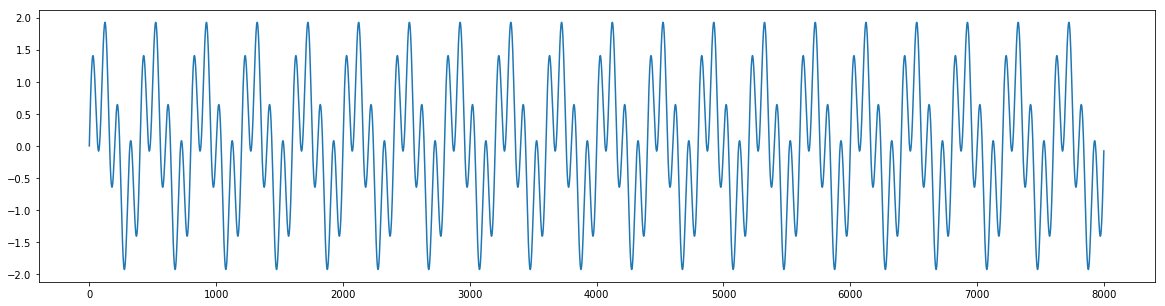

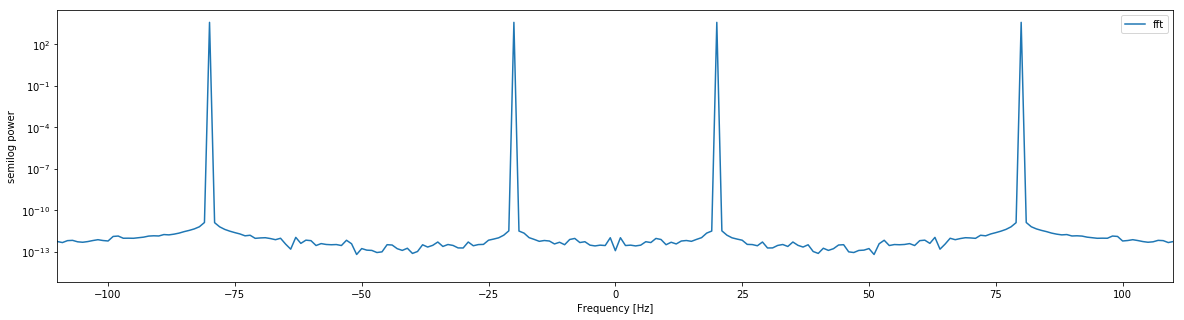

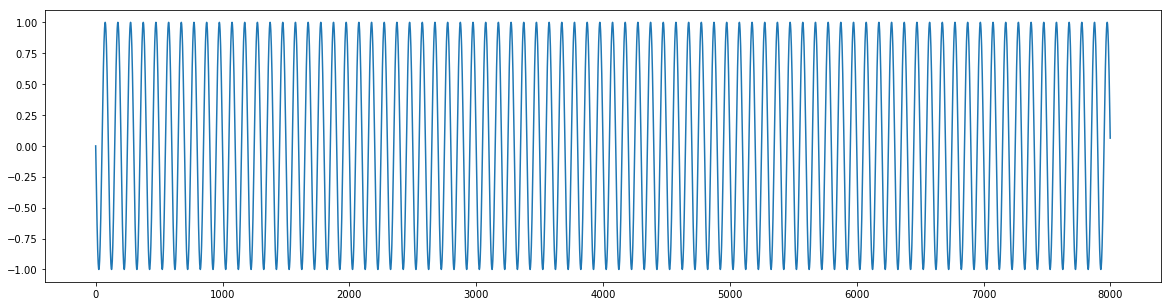

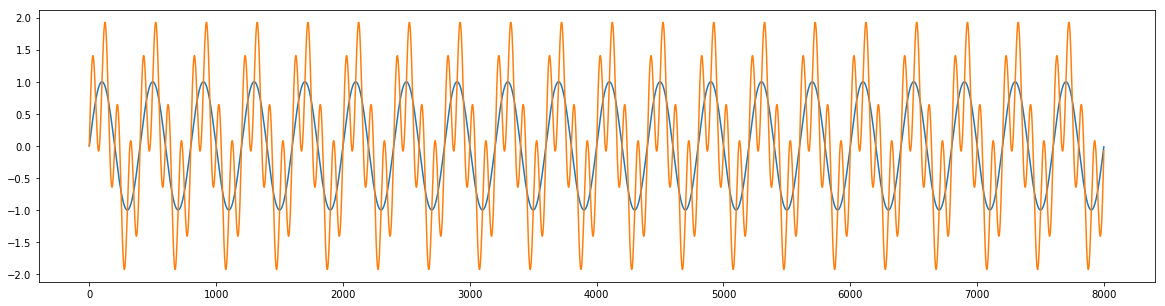

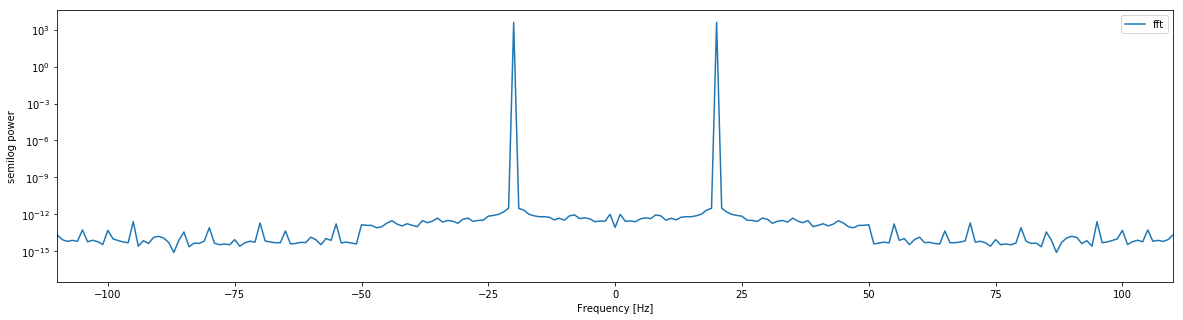

In [100]:
plt.figure(figsize=(20,5))
plt.plot(signal)
plt.show()

plt.figure(figsize=(20,5))
sig_fft, sampling_freq = su.compute_fft(signal, dt)
tpl.plot_fft(sig_fft, sampling_freq)
plt.show()

filtered_sig =  su.bandpass_filter(signal,-50, 50, dt)
plt.figure(figsize=(20,5))
plt.plot(filtered_sig- signal)
plt.show()
plt.figure(figsize=(20,5))
plt.plot(filtered_sig)
plt.plot(signal)
plt.show()

sig_fft, sampling_freq = su.compute_fft(filtered_sig, dt)
tpl.plot_fft(sig_fft, sampling_freq)
plt.show()

# This is filtered signal if we cut anything between 0.5 and 20000

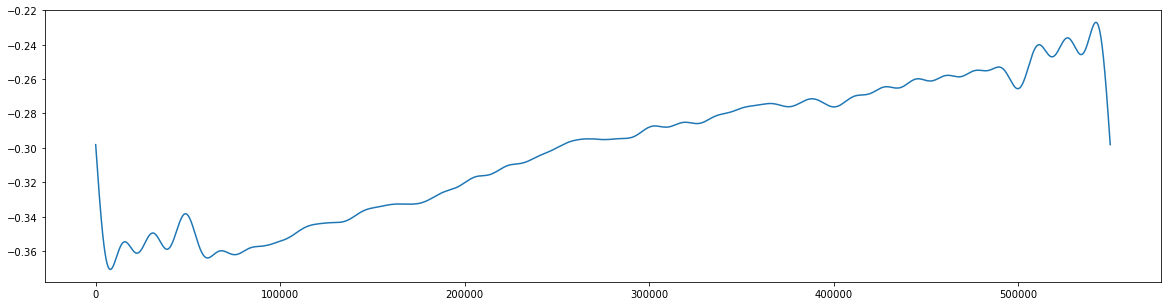

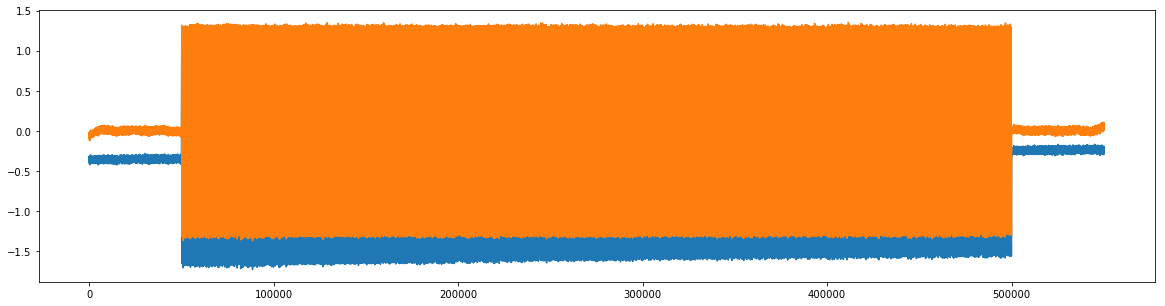

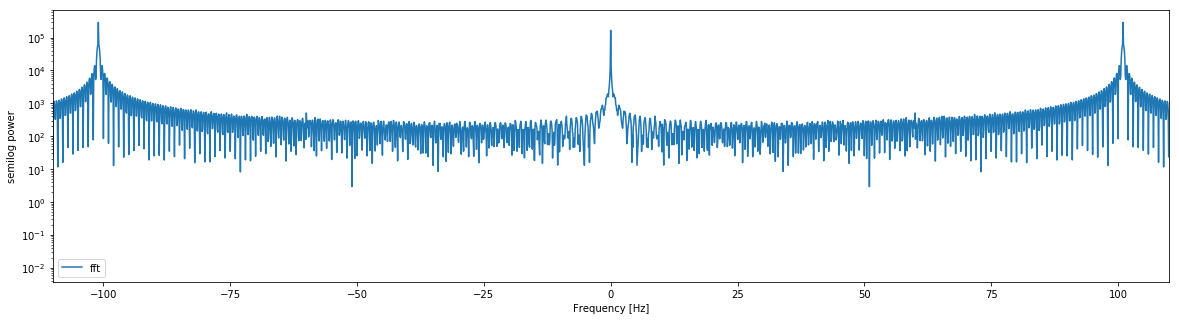

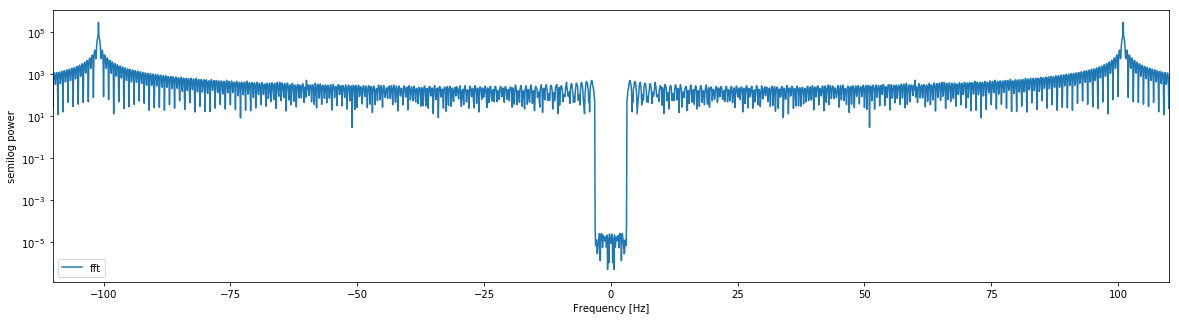

In [110]:
fil = bandpass_filter(signal = Ve,lowcut_freq=0.5, highcut_freq=20000, time_step=1./50000)
plt.figure(figsize=(20,5))
plt.plot(Ve-fil)
plt.show()

plt.figure(figsize=(20,5))
plt.plot(Ve)
plt.plot(fil)
plt.show()

a, b = compute_fft(Ve, 1./50000)
plot_fft(a, b)
plt.show()

a, b = compute_fft(fil, 1./50000)
plot_fft(a, b)
plt.show()